## Import dependecies

In [1]:
import pandas as pd
import os
import requests 
from bs4 import BeautifulSoup as bs
import nltk

# Text extraction

In [2]:
cases_df = pd.DataFrame([
    {'name': 'MARBURY v. MADISON', 'year': 1803, 'url': "https://caselaw.findlaw.com/us-supreme-court/5/137.html"},
    {'name': 'GIBBONS v. OGDEN', 'year': 1824, 'url': "https://caselaw.findlaw.com/us-supreme-court/22/1.html"},
    {'name': 'WORCESTER v. STATE OF GA.', 'year': 1832, 'url': "https://caselaw.findlaw.com/us-supreme-court/31/515.html"},
    {'name': 'DRED SCOTT v. SANDFORD', 'year': 1856, 'url': "https://caselaw.findlaw.com/us-supreme-court/60/393.html"},
    {'name': 'MUNN v. STATE OF ILLINOIS', 'year': 1876, 'url': 'https://caselaw.findlaw.com/us-supreme-court/94/113.html'},
    {'name': 'LOCHNER v. PEOPLE OF STATE OF NEW YORK', 'year': 1905, 'url': "https://caselaw.findlaw.com/us-supreme-court/198/45.html"},
    {'name': 'ABRAMS v. U S', 'year': 1919, 'url': "https://caselaw.findlaw.com/us-supreme-court/250/616.html"},
    {'name': 'COM. OF MASSACHUSETTS v. MELLON', 'year': 1923, 'url': "https://caselaw.findlaw.com/us-supreme-court/262/447.html"},
    {'name': 'BROWN v. BOARD OF EDUCATION', 'year': 1954, 'url': "https://caselaw.findlaw.com/us-supreme-court/347/483.html"},
    {'name': 'BUCK v. BELL(1927)', 'year': 1927, 'url': "https://caselaw.findlaw.com/us-supreme-court/274/200.html"},
    {'name': 'CHARLES RIVER BRIDGE v. WARREN BRIDGE', 'year': 1837, 'url': "https://caselaw.findlaw.com/us-supreme-court/36/420.html"},
    {'name': 'NEAR v.MINNESOTA', 'year': 1931, 'url': "https://caselaw.findlaw.com/us-supreme-court/283/697.html"},
    {'name': 'WICKARD v. FILBURN', 'year': 1942, 'url': "https://caselaw.findlaw.com/us-supreme-court/317/111.html"},
    {'name': 'MAPP v. OHIO', 'year': 1961, 'url': "https://caselaw.findlaw.com/us-supreme-court/367/643.html"},
    {'name': 'ENGEL v. VITALE', 'year': 1962, 'url': "https://caselaw.findlaw.com/us-supreme-court/370/421.html"},
    {'name': 'GIDEON v. WAINWRIGHT', 'year': 1963, 'url': "https://caselaw.findlaw.com/us-supreme-court/372/335.html"},
    {'name': 'REYNOLDS v. SIMS', 'year': 1964, 'url': "https://caselaw.findlaw.com/us-supreme-court/377/533.html"},
    {'name': 'ATLANTA MOTEL v. UNITED STATES', 'year': 1964, 'url': "https://caselaw.findlaw.com/us-supreme-court/379/241.html"},
    {'name': 'NEW YORK TIMES CO. v. SULLIVAN', 'year': 1964, 'url': "https://caselaw.findlaw.com/us-supreme-court/376/254.html"},
    {'name': 'MIRANDA v. ARIZONA', 'year': 1966, 'url': "https://caselaw.findlaw.com/us-supreme-court/384/436.html"},
    {'name': 'LOVING v. VIRGINIA', 'year': 1967, 'url': "https://caselaw.findlaw.com/us-supreme-court/388/1.html"},
    {'name': 'TERRY v. OHIO', 'year': 1968, 'url': "https://caselaw.findlaw.com/us-supreme-court/392/1.html"},
    {'name': 'BRANDENBURG v. OHIO', 'year': 1969, 'url': "https://caselaw.findlaw.com/us-supreme-court/395/444.html"},
    {'name': 'PHILLIPS v. MARTIN MARIETTA CORP.', 'year': 1971, 'url': "https://caselaw.findlaw.com/us-supreme-court/400/542.html"},
    {'name': 'WISCONSIN v. YODER', 'year': 1972, 'url': "https://caselaw.findlaw.com/us-supreme-court/406/205.html"},
    {'name': 'ROE v. WADE', 'year': 1973, 'url': "https://caselaw.findlaw.com/us-supreme-court/410/113.html"},
    {'name': 'SAN ANTONIO SCHOOL DISTRICT v. RODRIGUEZ', 'year': 1973, 'url': "https://caselaw.findlaw.com/us-supreme-court/411/1.html"},
    {'name': 'UNITED STATES v. NIXON', 'year': 1974, 'url': "https://caselaw.findlaw.com/us-supreme-court/418/683.html"},
    {'name': 'OCONNOR v. DONALDSON', 'year': 1975, 'url': "https://caselaw.findlaw.com/us-supreme-court/422/563.html"},
    {'name': 'BUCKLEY v. VALEO', 'year': 1976, 'url': "https://caselaw.findlaw.com/us-supreme-court/424/1.html"},
    {'name': 'FIRST NATIONAL BANK OF BOSTON v. BELLOTTI', 'year': 1978, 'url': "https://caselaw.findlaw.com/us-supreme-court/435/765.html"},
    {'name': 'UNIVERSITY OF CALIFORNIA REGENTS v. BAKKE', 'year': 1978, 'url': "https://caselaw.findlaw.com/us-supreme-court/438/265.html"},
    {'name': 'STRICKLAND v. WASHINGTON', 'year': 1984, 'url': "https://caselaw.findlaw.com/us-supreme-court/466/668.html"},
    {'name': 'TEXAS v. JOHNSON', 'year': 1989, 'url': "https://caselaw.findlaw.com/us-supreme-court/491/397.html"},
    {'name': 'MICHAEL H. v. GERALD D.', 'year': 1989, 'url': "https://caselaw.findlaw.com/us-supreme-court/491/110.html"},
    {'name': 'CRUZAN v. DIRECTOR, MDH', 'year': 1990, 'url': "https://caselaw.findlaw.com/us-supreme-court/497/261.html"},
    {'name': 'LAWRENCE V. TEXAS', 'year': 2003, 'url': "https://caselaw.findlaw.com/us-supreme-court/539/558.html"},
    {'name': 'GEORGIA v. RANDOLPH', 'year': 2006, 'url': "https://caselaw.findlaw.com/us-supreme-court/547/103.html"},
    {'name': 'MASSACHUSETTS ET AL. v. ENVIRONMENTAL PROTECTION AGENCY ET AL.', 'year': 2007, 'url': "https://caselaw.findlaw.com/us-supreme-court/549/497.html"},
    {'name': 'DISTRICT OF COLUMBIA ET AL. v. HELLER', 'year': 2008, 'url': "https://caselaw.findlaw.com/us-supreme-court/554/570.html"},
    {'name': 'CITIZENS UNITED v. FEDERAL ELECTION COMMISSION', 'year': 2010, 'url': "https://caselaw.findlaw.com/us-supreme-court/08-205.html"},
    {'name': 'NATIONAL FEDERATION OF INDEPENDENT BUSINESS ET AL. v. SEBELIUS, SECRETARY OF HEALTH AND HUMAN SERVICES, ET AL.', 'year': 2012, 'url': "https://caselaw.findlaw.com/us-supreme-court/11-393.html"},
    {'name': 'OBERGEFELL ET AL. v. HODGES, DIRECTOR, OHIO DEPARTMENT OF HEALTH, ET AL.', 'year': 2015, 'url': "https://caselaw.findlaw.com/us-supreme-court/14-556.html"},
    {'name': 'PLESSY v. FERGUSON', 'year': 1896, 'url': "https://caselaw.findlaw.com/us-supreme-court/163/537.html"},
    {'name': 'CHEVRON US A. v. NATURAL RES. DEF. COUNCIL', 'year': 1984, 'url': "https://caselaw.findlaw.com/us-supreme-court/467/837.html"}
])

#get csv of the dataframe

cases_df.to_csv('cases_name_year_url.csv', index=False)
cases_df



,name,year,url
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...


In [127]:
total_cases = len(cases_df)

In [128]:
total_cases

45

In [107]:
cases_df["name"][0]

'MARBURY v. MADISON'

In [3]:
#print length of the df
len(cases_df)

45

In [4]:
#create a list of all the neccesary URLs

urls = ["https://caselaw.findlaw.com/us-supreme-court/5/137.html",
       "https://caselaw.findlaw.com/us-supreme-court/22/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/31/515.html",
       "https://caselaw.findlaw.com/us-supreme-court/60/393.html",
       "https://caselaw.findlaw.com/us-supreme-court/94/113.html", 
       "https://caselaw.findlaw.com/us-supreme-court/198/45.html",
       "https://caselaw.findlaw.com/us-supreme-court/250/616.html",
       "https://caselaw.findlaw.com/us-supreme-court/262/447.html",
       "https://caselaw.findlaw.com/us-supreme-court/347/483.html",
       "https://caselaw.findlaw.com/us-supreme-court/274/200.html",
       "https://caselaw.findlaw.com/us-supreme-court/36/420.html",
       "https://caselaw.findlaw.com/us-supreme-court/283/697.html",
       "https://caselaw.findlaw.com/us-supreme-court/317/111.html",
       "https://caselaw.findlaw.com/us-supreme-court/367/643.html",
       "https://caselaw.findlaw.com/us-supreme-court/370/421.html",
       "https://caselaw.findlaw.com/us-supreme-court/372/335.html",
       "https://caselaw.findlaw.com/us-supreme-court/377/533.html",
       "https://caselaw.findlaw.com/us-supreme-court/379/241.html",
       "https://caselaw.findlaw.com/us-supreme-court/376/254.html",
       "https://caselaw.findlaw.com/us-supreme-court/384/436.html",
       "https://caselaw.findlaw.com/us-supreme-court/388/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/392/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/395/444.html",
       "https://caselaw.findlaw.com/us-supreme-court/400/542.html",
       "https://caselaw.findlaw.com/us-supreme-court/406/205.html",
       "https://caselaw.findlaw.com/us-supreme-court/410/113.html",
       "https://caselaw.findlaw.com/us-supreme-court/411/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/418/683.html",
       "https://caselaw.findlaw.com/us-supreme-court/422/563.html",
       "https://caselaw.findlaw.com/us-supreme-court/424/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/435/765.html",
       "https://caselaw.findlaw.com/us-supreme-court/438/265.html",
       "https://caselaw.findlaw.com/us-supreme-court/466/668.html",
       "https://caselaw.findlaw.com/us-supreme-court/491/397.html",
       "https://caselaw.findlaw.com/us-supreme-court/491/110.html",
       "https://caselaw.findlaw.com/us-supreme-court/497/261.html",
       "https://caselaw.findlaw.com/us-supreme-court/547/103.html",
       "https://caselaw.findlaw.com/us-supreme-court/539/558.html",
       "https://caselaw.findlaw.com/us-supreme-court/549/497.html",
       "https://caselaw.findlaw.com/us-supreme-court/554/570.html",
       "https://caselaw.findlaw.com/us-supreme-court/08-205.html",
       "https://caselaw.findlaw.com/us-supreme-court/11-393.html",
       "https://caselaw.findlaw.com/us-supreme-court/14-556.html",
        "https://caselaw.findlaw.com/us-supreme-court/163/537.html",
       "https://caselaw.findlaw.com/us-supreme-court/467/837.html"]
#print length to see if it matches the DF
len(urls)

45

In [5]:
#loop over urls to scrape the texts and append to our empty list

texts=[]
list1= []
list2 = []
empty_dict={}
for url in urls:
    response = requests.get(url)
    soup = bs(response.text,'html.parser')
    results = soup.find_all("div", class_="caselawcontent searchable-content")[0].get_text() 
    list1.append(url)
    list2.append(results)
    

In [6]:
#create a new df of the scraped text

df2 = {'url':list1, 'text':list2}
df2 = pd.DataFrame(df2)
df2

,url,text
0,https://caselaw.findlaw.com/us-supreme-court/5...,\n\nUnited States Supreme Court\nMARBURY v. MA...
1,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nGIBBONS v. OG...
2,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nWORCESTER v. ...
3,https://caselaw.findlaw.com/us-supreme-court/6...,\n\nUnited States Supreme Court\nDRED SCOTT v....
4,https://caselaw.findlaw.com/us-supreme-court/9...,\n\nUnited States Supreme Court\nMUNN v. STATE...
5,https://caselaw.findlaw.com/us-supreme-court/1...,\n\nUnited States Supreme Court\nLOCHNER v. PE...
6,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nABRAMS v. U S...
7,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nCOM. OF MASSA...
8,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nBROWN v. BOAR...
9,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nBUCK v. BELL(...


In [7]:
#merge the two dataframes together

cases_df=cases_df.merge(df2, on='url')
cases_df

,name,year,url,text
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,\n\nUnited States Supreme Court\nMARBURY v. MA...
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nGIBBONS v. OG...
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nWORCESTER v. ...
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,\n\nUnited States Supreme Court\nDRED SCOTT v....
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,\n\nUnited States Supreme Court\nMUNN v. STATE...
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,\n\nUnited States Supreme Court\nLOCHNER v. PE...
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nABRAMS v. U S...
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nCOM. OF MASSA...
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nBROWN v. BOAR...
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nBUCK v. BELL(...


In [8]:
cases_df.to_csv("final_data.csv")

# Text Preprocessing

In [9]:
#remove \n
cases_df= cases_df.replace('\n','', regex=True)
cases_df

,name,year,url,text
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,United States Supreme CourtMARBURY v. MADISON(...
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme CourtGIBBONS v. OGDEN(18...
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,United States Supreme CourtWORCESTER v. STATE ...
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,United States Supreme CourtDRED SCOTT v. SANDF...
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,United States Supreme CourtMUNN v. STATE OF IL...
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,United States Supreme CourtLOCHNER v. PEOPLE O...
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme CourtABRAMS v. U S(1919)...
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme CourtCOM. OF MASSACHUSET...
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,United States Supreme CourtBROWN v. BOARD OF E...
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme CourtBUCK v. BELL(1927)N...


In [10]:
cases_df = cases_df.replace(to_replace ='[Cc]ourt', value = 'court ', regex = True)
cases_df = cases_df.replace(to_replace ='[Mm]adison', value = 'madison ', regex = True)
cases_df = cases_df.replace(to_replace ='[aA]rgued', value = ' argued', regex = True)
cases_df = cases_df.replace(to_replace ='[nN]o', value = ' no', regex = True)

In [11]:
#lowercase
cases_df['text'] = cases_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
cases_df['text'][3]

'united states supreme court dred scott v. sandford(1856) no. 38 argued: decided: december 1, 1856[60 u.s. 393, 396] this case was brought up, by writ of error, from the circuit court of the united states for the district of missouri. it was an action of trespass vi et armis instituted in the circuit court by scott against sandford. prior to the institution of the present suit, an action was brought by scott for his freedom in the circuit court of st. louis county, (state court ,) where there was a verdict and judgment in his favor. on a writ of error to the supreme court of the state, the judgment below was reversed, and the case remanded to the circuit court , where it was continued to await the decision of the case now in question. the declaration of scott contained three counts: one, that sandford had assaulted the plaintiff; one, that he had assaulted harriet scott, his wife; and one, that he had assaulted eliza scott and lizzie scott, his children. sandford appeared, and filed th

In [12]:
#remove punctuation
cases_df['text'] = cases_df['text'].str.replace('[^\w\s]','')
cases_df['text']

0     united states supreme court marbury v madison1...
1     united states supreme court gibbons v ogden182...
2     united states supreme court worcester v state ...
3     united states supreme court dred scott v sandf...
4     united states supreme court munn v state of il...
5     united states supreme court lochner v people o...
6     united states supreme court abrams v u s1919 n...
7     united states supreme court com of massachuset...
8     united states supreme court brown v board of e...
9     united states supreme court buck v bell1927 no...
10    united states supreme court proprietors of cha...
11    united states supreme court near v state of mi...
12    united states supreme court wickard v filburn1...
13    united states supreme court mapp v ohio1961 no...
14    united states supreme court engel v vitale1962...
15    united states supreme court gideon v wainwrigh...
16    united states supreme court reynolds v sims196...
17    united states supreme court atlanta motel 

In [13]:
#remove numbers
cases_df['text'] = cases_df['text'].str.replace('\d+', '')
cases_df['text']

0     united states supreme court marbury v madison ...
1     united states supreme court gibbons v ogden no...
2     united states supreme court worcester v state ...
3     united states supreme court dred scott v sandf...
4     united states supreme court munn v state of il...
5     united states supreme court lochner v people o...
6     united states supreme court abrams v u s no  a...
7     united states supreme court com of massachuset...
8     united states supreme court brown v board of e...
9     united states supreme court buck v bell no  ar...
10    united states supreme court proprietors of cha...
11    united states supreme court near v state of mi...
12    united states supreme court wickard v filburn ...
13    united states supreme court mapp v ohio no  ar...
14    united states supreme court engel v vitale no ...
15    united states supreme court gideon v wainwrigh...
16    united states supreme court reynolds v sims no...
17    united states supreme court atlanta motel 

In [14]:
#remove words if length less than 1
cases_df['text'] = cases_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
cases_df['text']

0     united states supreme court marbury madison ar...
1     united states supreme court gibbons ogden no a...
2     united states supreme court worcester state of...
3     united states supreme court dred scott sandfor...
4     united states supreme court munn state of illi...
5     united states supreme court lochner people of ...
6     united states supreme court abrams no argued d...
7     united states supreme court com of massachuset...
8     united states supreme court brown board of edu...
9     united states supreme court buck bell no argue...
10    united states supreme court proprietors of cha...
11    united states supreme court near state of minn...
12    united states supreme court wickard filburn no...
13    united states supreme court mapp ohio no argue...
14    united states supreme court engel vitale no ar...
15    united states supreme court gideon wainwright ...
16    united states supreme court reynolds sims no a...
17    united states supreme court atlanta motel 

### Lemmatization 

In [19]:
#lemmatization and taking root of verbs only

#!pip install -U textblob
import nltk
#nltk.download('wordnet')
from textblob import Word

cases_df['text'] = cases_df['text'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))

cases_df['text']

0     unite state supreme court marbury madison argu...
1     unite state supreme court gibbons ogden no arg...
2     unite state supreme court worcester state of g...
3     unite state supreme court dred scott sandford ...
4     unite state supreme court munn state of illino...
5     unite state supreme court lochner people of st...
6     unite state supreme court abrams no argue deci...
7     unite state supreme court com of massachusetts...
8     unite state supreme court brown board of educa...
9     unite state supreme court buck bell no argue a...
10    unite state supreme court proprietors of charl...
11    unite state supreme court near state of minnes...
12    unite state supreme court wickard filburn no a...
13    unite state supreme court mapp ohio no argue m...
14    unite state supreme court engel vitale no argu...
15    unite state supreme court gideon wainwright no...
16    unite state supreme court reynolds sims no arg...
17    unite state supreme court atlanta motel un

In [20]:
cases_df['text'][0]

'unite state supreme court marbury madison argue decide february at the december term william marbury dennis ramsay robert townsend hooe and william harper by their counsel us severally move the court for rule to jam madison secretary of state of the unite state to show cause why mandamus should not issue command him to cause to be deliver to them respectively their several commission as justices of the peace in the district of columbia this motion be support by affidavits of the follow facts that notice of this motion have be give to mr madison that mr adams the late president of the unite state nominate the applicants to the senate for their advice and consent to be appoint justices of the peace of the district of columbia that the senate advise and consent to the appointments that commission in due form be sign by the say president appoint them justices and that the seal of the unite state be in due form affix to the say commission by the secretary of state that the applicants have 

### Stopwords removal 

In [21]:
#stopwords

#!pip install nltk
#nltk.download()

from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')

cases_df['text'] = cases_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

cases_df['text'][0]

'unite state supreme court marbury madison argue decide february december term william marbury dennis ramsay robert townsend hooe william harper counsel us severally move court rule jam madison secretary state unite state show cause mandamus issue command cause deliver respectively several commission justices peace district columbia motion support affidavits follow facts notice motion give mr madison mr adams late president unite state nominate applicants senate advice consent appoint justices peace district columbia senate advise consent appointments commission due form sign say president appoint justices seal unite state due form affix say commission secretary state applicants request mr madison deliver say commission comply request say commission withhold applicants make application mr madison secretary state unite state office information whether commission sign seal aforesaid explicit satisfactory information give answer inquiry either secretary state officer department state appl

In [22]:
cases_df['text'][0]

'unite state supreme court marbury madison argue decide february december term william marbury dennis ramsay robert townsend hooe william harper counsel us severally move court rule jam madison secretary state unite state show cause mandamus issue command cause deliver respectively several commission justices peace district columbia motion support affidavits follow facts notice motion give mr madison mr adams late president unite state nominate applicants senate advice consent appoint justices peace district columbia senate advise consent appointments commission due form sign say president appoint justices seal unite state due form affix say commission secretary state applicants request mr madison deliver say commission comply request say commission withhold applicants make application mr madison secretary state unite state office information whether commission sign seal aforesaid explicit satisfactory information give answer inquiry either secretary state officer department state appl

In [23]:
#set variable for column
text = cases_df['text']

### Tokenization 

In [24]:
#tokenization
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = text.apply(word_tokenize)
text_tokens


0     [unite, state, supreme, court, marbury, madiso...
1     [unite, state, supreme, court, gibbons, ogden,...
2     [unite, state, supreme, court, worcester, stat...
3     [unite, state, supreme, court, dred, scott, sa...
4     [unite, state, supreme, court, munn, state, il...
5     [unite, state, supreme, court, lochner, people...
6     [unite, state, supreme, court, abrams, argue, ...
7     [unite, state, supreme, court, com, massachuse...
8     [unite, state, supreme, court, brown, board, e...
9     [unite, state, supreme, court, buck, bell, arg...
10    [unite, state, supreme, court, proprietors, ch...
11    [unite, state, supreme, court, near, state, mi...
12    [unite, state, supreme, court, wickard, filbur...
13    [unite, state, supreme, court, mapp, ohio, arg...
14    [unite, state, supreme, court, engel, vitale, ...
15    [unite, state, supreme, court, gideon, wainwri...
16    [unite, state, supreme, court, reynolds, sims,...
17    [unite, state, supreme, court, atlanta, mo

In [27]:
text_tokens[0]

['unite',
 'state',
 'supreme',
 'court',
 'marbury',
 'madison',
 'argue',
 'decide',
 'february',
 'december',
 'term',
 'william',
 'marbury',
 'dennis',
 'ramsay',
 'robert',
 'townsend',
 'hooe',
 'william',
 'harper',
 'counsel',
 'us',
 'severally',
 'move',
 'court',
 'rule',
 'jam',
 'madison',
 'secretary',
 'state',
 'unite',
 'state',
 'show',
 'cause',
 'mandamus',
 'issue',
 'command',
 'cause',
 'deliver',
 'respectively',
 'several',
 'commission',
 'justices',
 'peace',
 'district',
 'columbia',
 'motion',
 'support',
 'affidavits',
 'follow',
 'facts',
 'notice',
 'motion',
 'give',
 'mr',
 'madison',
 'mr',
 'adams',
 'late',
 'president',
 'unite',
 'state',
 'nominate',
 'applicants',
 'senate',
 'advice',
 'consent',
 'appoint',
 'justices',
 'peace',
 'district',
 'columbia',
 'senate',
 'advise',
 'consent',
 'appointments',
 'commission',
 'due',
 'form',
 'sign',
 'say',
 'president',
 'appoint',
 'justices',
 'seal',
 'unite',
 'state',
 'due',
 'form',
 'aff

In [112]:
len(text_tokens[0])

4381

In [29]:
#remove brackets 
text_tokens_df = text_tokens.apply(lambda x: ",".join(x) if isinstance(x, list) else x)
text_tokens_df[4]

'unite,state,supreme,court,munn,state,illinois,argue,decide,october,munn,state,illi,nois,us,error,supreme,court,state,illi,nois,constitution,illi,nois,adopt,contain,follow,reference,inspection,grain,storage,thereof,public,warehousesarticle,xiiiwarehousessection,elevators,storehouses,grain,property,store,compensation,whether,property,store,keep,separate,declare,public,warehousessect,owner,lessee,manager,every,public,warehouse,situate,town,city,less,one,hundred,thousand,inhabitants,shall,make,weekly,statements,oath,officer,designate,law,keep,post,conspicuous,place,office,warehouse,shall,also,file,copy,public,examination,place,shall,designate,law,statement,shall,correctly,set,forth,amount,grade,every,kind,grain,warehouse,together,property,may,store,therein,warehouse,receipt,issue,time,make,statement,outstanding,therefor,shall,copy,post,warehouse,note,daily,change,may,make,quantity,grade,grain,warehouse,different,grade,grain,ship,separate,lot,shall,us,mix,inferior,superior,grade,without,co

In [30]:
text_tokens_df = pd.DataFrame(text_tokens_df)

text_tokens_df = text_tokens_df.rename(columns={'text': 'tokens'})
text_tokens_df

,tokens
0,"unite,state,supreme,court,marbury,madison,argu..."
1,"unite,state,supreme,court,gibbons,ogden,argue,..."
2,"unite,state,supreme,court,worcester,state,ga,a..."
3,"unite,state,supreme,court,dred,scott,sandford,..."
4,"unite,state,supreme,court,munn,state,illinois,..."
5,"unite,state,supreme,court,lochner,people,state..."
6,"unite,state,supreme,court,abrams,argue,decide,..."
7,"unite,state,supreme,court,com,massachusetts,me..."
8,"unite,state,supreme,court,brown,board,educatio..."
9,"unite,state,supreme,court,buck,bell,argue,apri..."


### Part-Of-Speech Tagging

In [31]:
#get POS tags with NLTK
pos_tag = text_tokens.apply(nltk.pos_tag)
pos_tag

0     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
1     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
2     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
3     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
4     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
5     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
6     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
7     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
8     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
9     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
10    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
11    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
12    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
13    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
14    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
15    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
16    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
17    [(unite, JJ), (state, NN), (supreme, JJ), 

In [34]:
pos_tag[0]

[('unite', 'JJ'),
 ('state', 'NN'),
 ('supreme', 'JJ'),
 ('court', 'NN'),
 ('marbury', 'NN'),
 ('madison', 'NNP'),
 ('argue', 'NN'),
 ('decide', 'NN'),
 ('february', 'JJ'),
 ('december', 'JJ'),
 ('term', 'NN'),
 ('william', 'JJ'),
 ('marbury', 'NN'),
 ('dennis', 'NNS'),
 ('ramsay', 'VBP'),
 ('robert', 'JJ'),
 ('townsend', 'NN'),
 ('hooe', 'NN'),
 ('william', 'WRB'),
 ('harper', 'NN'),
 ('counsel', 'NN'),
 ('us', 'PRP'),
 ('severally', 'RB'),
 ('move', 'VBP'),
 ('court', 'NN'),
 ('rule', 'NN'),
 ('jam', 'NN'),
 ('madison', 'NN'),
 ('secretary', 'NN'),
 ('state', 'NN'),
 ('unite', 'JJ'),
 ('state', 'NN'),
 ('show', 'NN'),
 ('cause', 'NN'),
 ('mandamus', 'JJ'),
 ('issue', 'NN'),
 ('command', 'NN'),
 ('cause', 'NN'),
 ('deliver', 'NN'),
 ('respectively', 'RB'),
 ('several', 'JJ'),
 ('commission', 'NN'),
 ('justices', 'NNS'),
 ('peace', 'VBP'),
 ('district', 'NN'),
 ('columbia', 'NN'),
 ('motion', 'NN'),
 ('support', 'NN'),
 ('affidavits', 'NNS'),
 ('follow', 'VBP'),
 ('facts', 'NNS'),
 ('n

In [50]:
pos_tag[0][0]

('unite', 'JJ')

In [47]:
pos_tag[0][0][1]

'JJ'

In [48]:
case0_len = len(pos_tag[0])

In [49]:
case0_len

4381

In [95]:
set_of_tags = set()
case_number = 0
for tag in pos_tag[case_number]:
    set_of_tags.add(tag[1])    

In [96]:
set_of_tags

{'CC',
 'CD',
 'DT',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNS',
 'PRP',
 'RB',
 'RBR',
 'RBS',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP$',
 'WRB'}

In [97]:
list_of_tags = []

In [98]:
list_of_tags = []
list_frequency = []
tag_frequency = 0
for tag in set_of_tags:
    print(tag)
    list_of_tags.append(tag)
    tag_frequency = 0
    for entry in pos_tag[case_number]:
        if (entry[1] == tag):
            tag_frequency = tag_frequency+1
    list_frequency.append(tag_frequency)

JJ
VBN
MD
VBZ
CC
JJS
DT
NNS
CD
RBR
IN
JJR
RB
RBS
VBG
VBD
WP$
NN
VBP
PRP
WDT
VB
FW
NNP
WRB


In [99]:
list_of_tags

['JJ',
 'VBN',
 'MD',
 'VBZ',
 'CC',
 'JJS',
 'DT',
 'NNS',
 'CD',
 'RBR',
 'IN',
 'JJR',
 'RB',
 'RBS',
 'VBG',
 'VBD',
 'WP$',
 'NN',
 'VBP',
 'PRP',
 'WDT',
 'VB',
 'FW',
 'NNP',
 'WRB']

In [100]:
list_frequency

[861,
 7,
 155,
 10,
 2,
 11,
 12,
 166,
 29,
 1,
 83,
 4,
 217,
 1,
 9,
 21,
 2,
 2261,
 228,
 33,
 8,
 250,
 6,
 3,
 1]

In [101]:
pos_tag_frequency_df = pd.DataFrame(list(zip(list_of_tags, list_frequency)),
              columns=['part_of_speech_tag','pos_tag_frequency'])

In [92]:
pos_tag_frequency_df

,part_of_speech_tag,pos_tag_frequency
0,JJ,861
1,VBN,7
2,MD,155
3,VBZ,10
4,CC,2
5,JJS,11
6,DT,12
7,NNS,166
8,CD,29
9,RBR,1


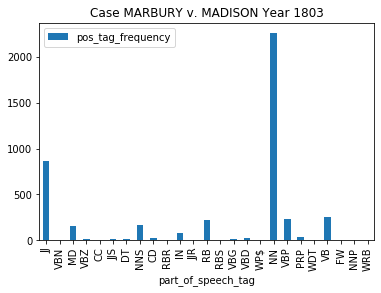

In [126]:
case_number = 0
case_Name = cases_df["name"][case_number]
case_Year = cases_df["year"][case_number]
header = 'Case ' + case_Name + ' Year ' + str(case_Year)
ax = pos_tag_frequency_df.plot.bar(x='part_of_speech_tag', y='pos_tag_frequency', rot=90, title=header).get_figure().savefig("NLP_POS_Graphs/case0_pos.png")


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


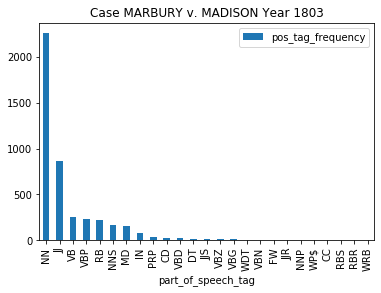

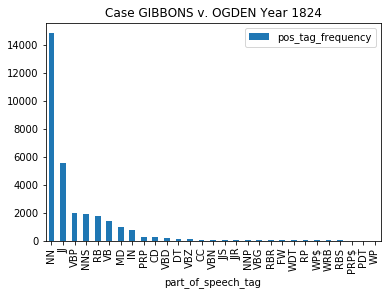

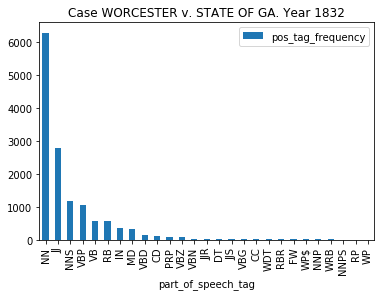

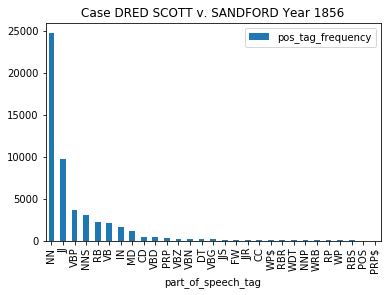

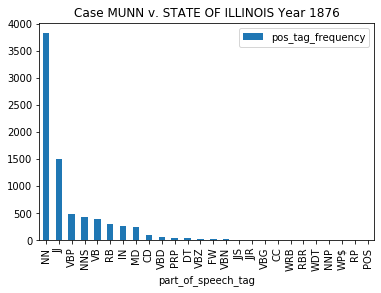

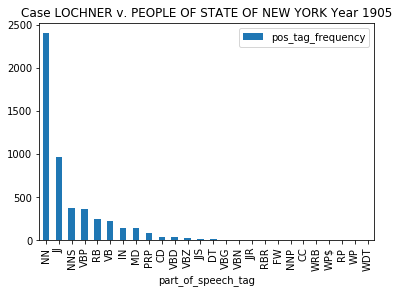

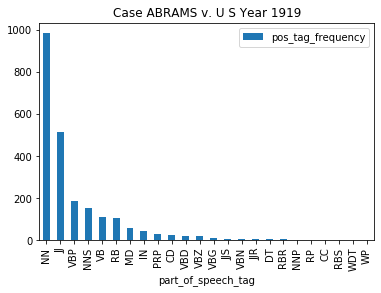

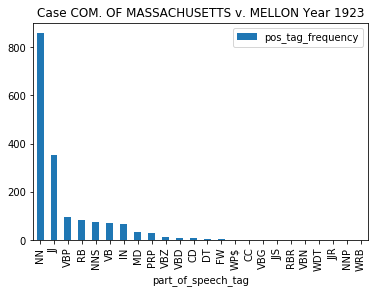

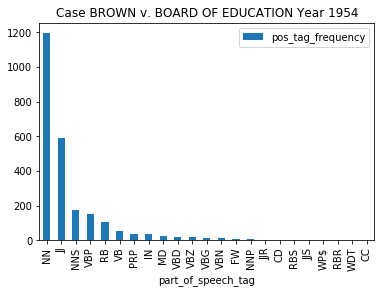

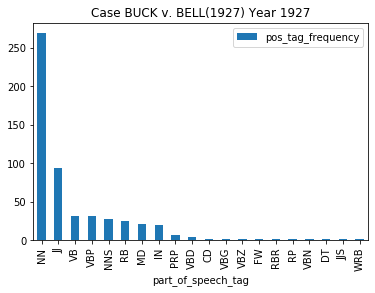

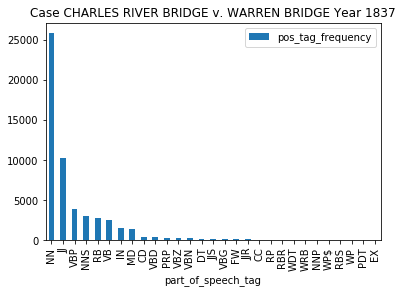

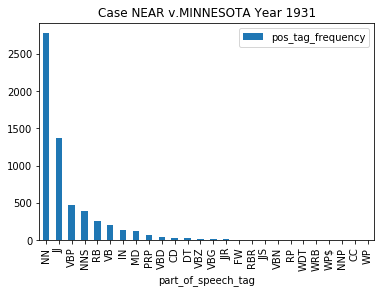

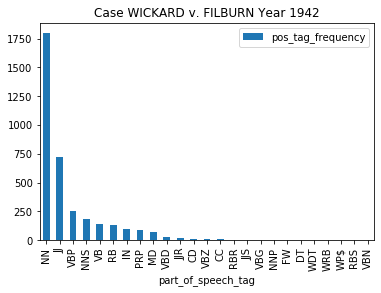

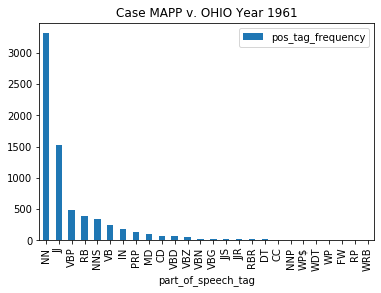

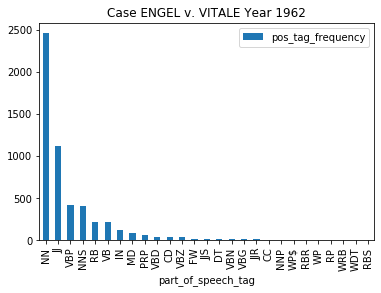

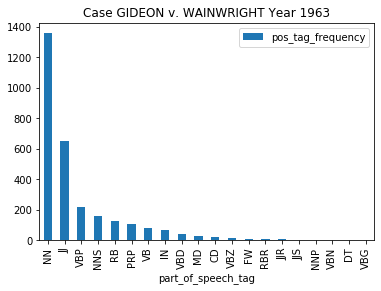

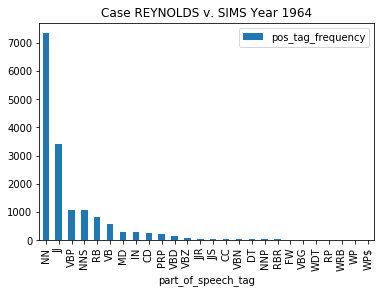

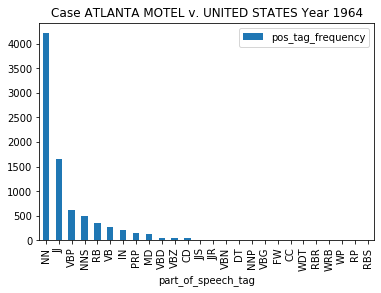

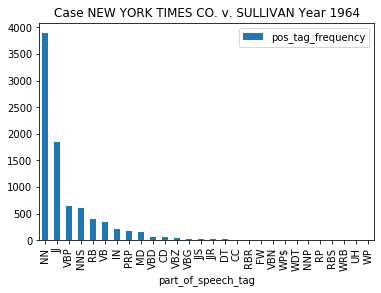

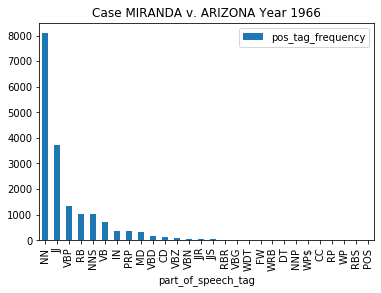

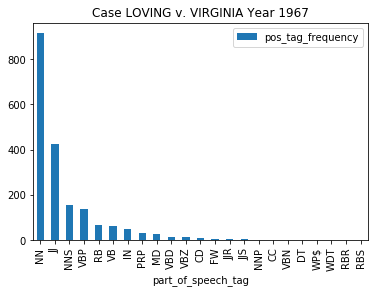

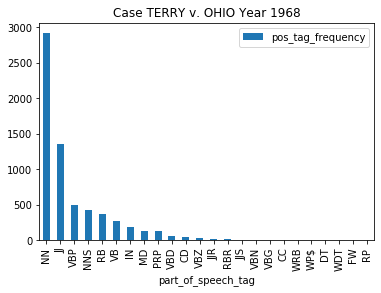

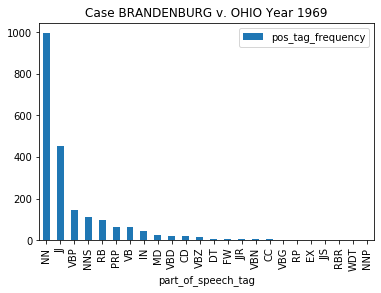

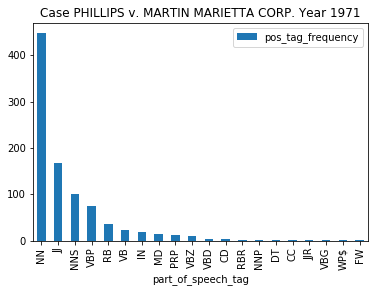

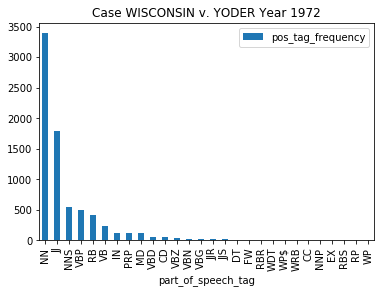

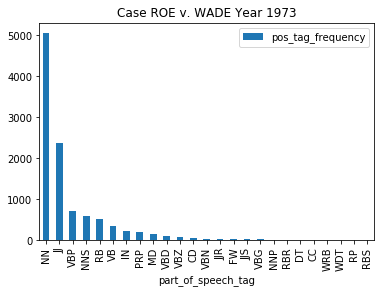

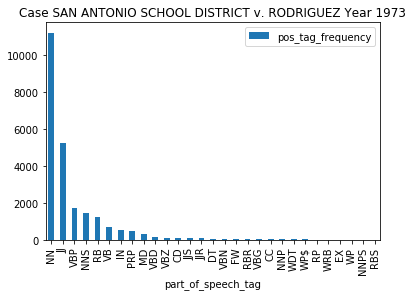

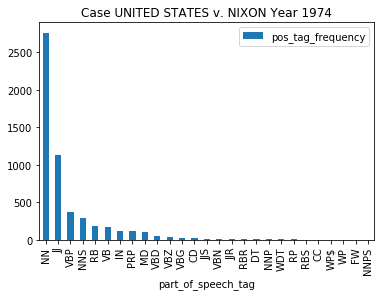

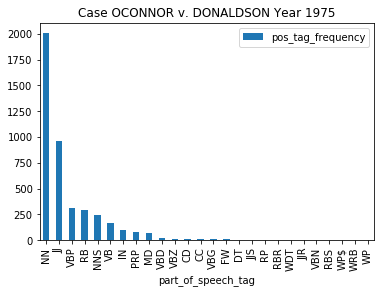

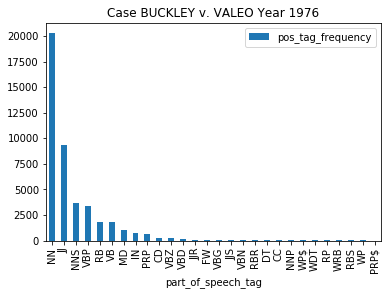

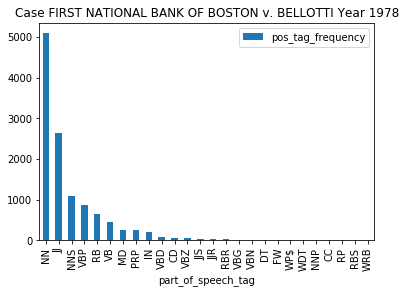

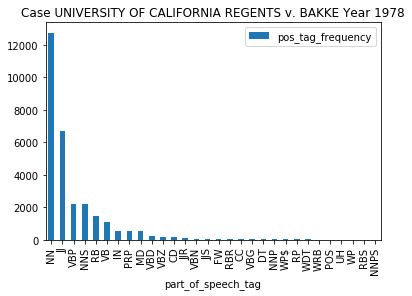

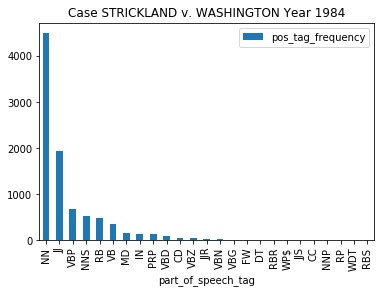

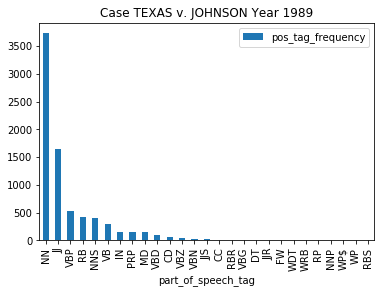

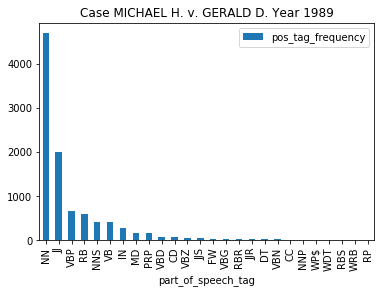

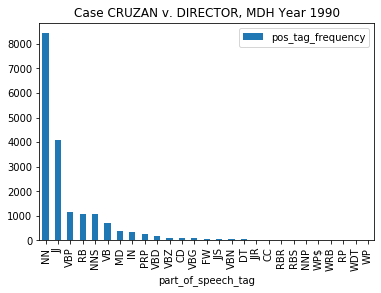

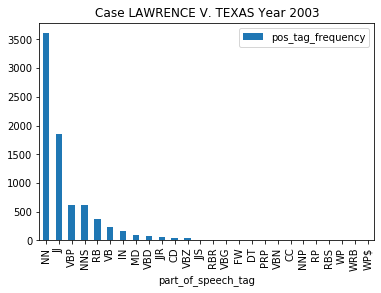

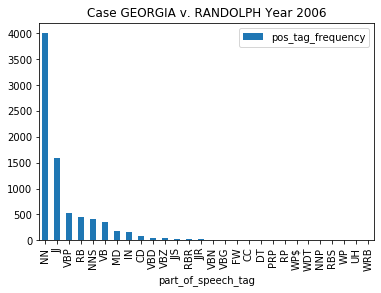

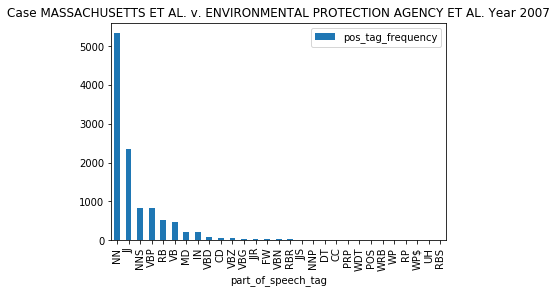

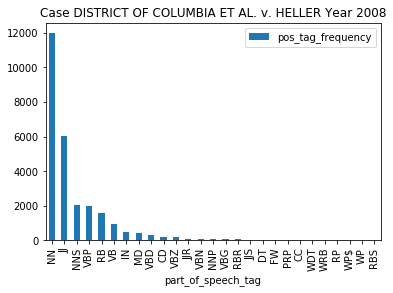

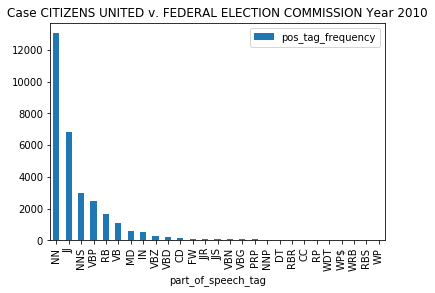

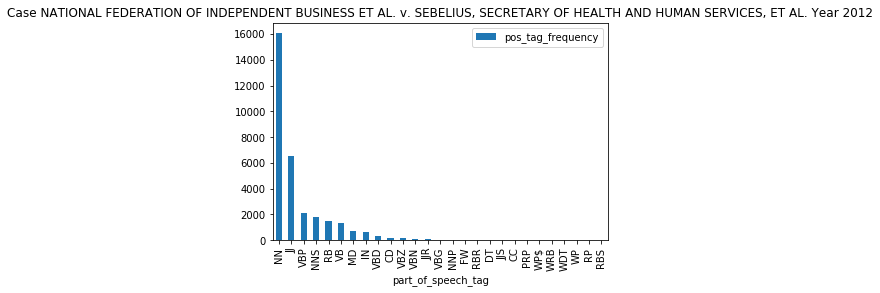

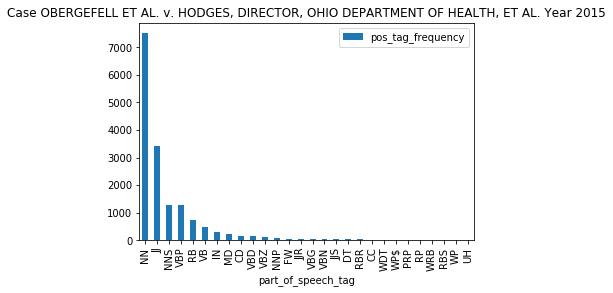

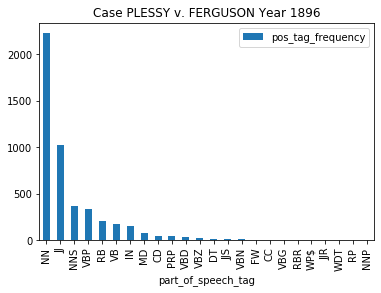

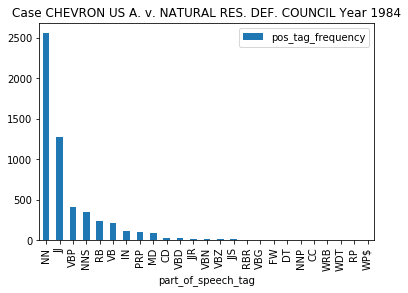

In [163]:
total_cases = 45

for case_number in range(total_cases):
    set_of_tags = set()
    for tag in pos_tag[case_number]:
        set_of_tags.add(tag[1]) 
    list_of_tags = []
    list_frequency = []
    tag_frequency = 0
    for tag in set_of_tags:
        list_of_tags.append(tag)
        tag_frequency = 0
        for entry in pos_tag[case_number]:
            if (entry[1] == tag):
                tag_frequency = tag_frequency+1
        list_frequency.append(tag_frequency)       
    pos_tag_frequency_df = pd.DataFrame(list(zip(list_of_tags, list_frequency)),
              columns=['part_of_speech_tag','pos_tag_frequency'])
    pos_tag_frequency_df = pos_tag_frequency_df.sort_values(by='pos_tag_frequency', ascending=False)
    case_Name = cases_df["name"][case_number]
    case_Year = cases_df["year"][case_number]
    header = 'Case ' + case_Name + ' Year ' + str(case_Year)
    ax = pos_tag_frequency_df.plot.bar(x='part_of_speech_tag', y='pos_tag_frequency', rot=90, title=header).get_figure().savefig('NLP_POS_Graphs/POS_Graph.png')

# Saving Images Case By Case

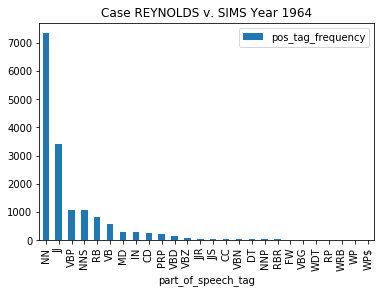

In [162]:
case_number = 16
set_of_tags = set()
for tag in pos_tag[case_number]:
    set_of_tags.add(tag[1]) 
list_of_tags = []
list_frequency = []
tag_frequency = 0
for tag in set_of_tags:
    list_of_tags.append(tag)
    tag_frequency = 0
    for entry in pos_tag[case_number]:
        if (entry[1] == tag):
            tag_frequency = tag_frequency+1
    list_frequency.append(tag_frequency)       
pos_tag_frequency_df = pd.DataFrame(list(zip(list_of_tags, list_frequency)),
              columns=['part_of_speech_tag','pos_tag_frequency'])
pos_tag_frequency_df = pos_tag_frequency_df.sort_values(by='pos_tag_frequency', ascending=False)
case_Name = cases_df["name"][case_number]
case_Year = cases_df["year"][case_number]
header = 'Case ' + case_Name + ' Year ' + str(case_Year)
ax = pos_tag_frequency_df.plot.bar(x='part_of_speech_tag', y='pos_tag_frequency', rot=90, title=header).get_figure().savefig('NLP_POS_Graphs/Case_16.png')

In [164]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [165]:
nltk.help.upenn_tagset("JJ")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [166]:
nltk.help.upenn_tagset("VBP")

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [167]:
nltk.help.upenn_tagset("NNS")

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [168]:
nltk.help.upenn_tagset("RB")

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [169]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [170]:
nltk.help.upenn_tagset("IN")

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [171]:
nltk.help.upenn_tagset("MD")

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


In [172]:
nltk.help.upenn_tagset("CD")

CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...


In [69]:
#find out the meaning of specific tags

#nltk.download('tagsets')
nltk.help.upenn_tagset("JJ")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [38]:
nltk.help.upenn_tagset("PRP")

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [41]:
nltk.help.upenn_tagset("DT")

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [43]:
#convert series to DF
pos_tag_df = pd.Series(pos_tag,
               name="POS_tags")
pos_tag_df.to_frame()

,POS_tags
0,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
1,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
2,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
3,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
4,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
5,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
6,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
7,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
8,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
9,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."


In [44]:
#merge the two dataframes together

text_and_tokens = pd.concat([cases_df, text_tokens_df], axis=1)
text_and_tokens

,name,year,url,text,tokens
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court marbury madison argu...,"unite,state,supreme,court,marbury,madison,argu..."
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court gibbons ogden argue ...,"unite,state,supreme,court,gibbons,ogden,argue,..."
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court worcester state ga a...,"unite,state,supreme,court,worcester,state,ga,a..."
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court dred scott sandford ...,"unite,state,supreme,court,dred,scott,sandford,..."
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court munn state illinois ...,"unite,state,supreme,court,munn,state,illinois,..."
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court lochner people state...,"unite,state,supreme,court,lochner,people,state..."
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court abrams argue decide ...,"unite,state,supreme,court,abrams,argue,decide,..."
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court com massachusetts me...,"unite,state,supreme,court,com,massachusetts,me..."
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court brown board educatio...,"unite,state,supreme,court,brown,board,educatio..."
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court /...,unite state supreme court buck bell argue apri...,"unite,state,supreme,court,buck,bell,argue,apri..."


In [173]:
#TF-IDF
from nltk.probability import FreqDist
frequency_dist = text_tokens.apply(nltk.FreqDist)
frequency_dist

0     {'unite': 48, 'state': 89, 'supreme': 18, 'cou...
1     {'unite': 170, 'state': 1198, 'supreme': 20, '...
2     {'unite': 220, 'state': 512, 'supreme': 34, 'c...
3     {'unite': 586, 'state': 1882, 'supreme': 76, '...
4     {'unite': 18, 'state': 133, 'supreme': 11, 'co...
5     {'unite': 8, 'state': 104, 'supreme': 11, 'cou...
6     {'unite': 47, 'state': 47, 'supreme': 2, 'cour...
7     {'unite': 8, 'state': 73, 'supreme': 2, 'court...
8     {'unite': 13, 'state': 40, 'supreme': 4, 'cour...
9     {'unite': 1, 'state': 7, 'supreme': 3, 'court'...
10    {'unite': 86, 'state': 649, 'supreme': 36, 'co...
11    {'unite': 10, 'state': 65, 'supreme': 10, 'cou...
12    {'unite': 38, 'state': 62, 'supreme': 1, 'cour...
13    {'unite': 45, 'state': 184, 'supreme': 14, 'co...
14    {'unite': 10, 'state': 63, 'supreme': 9, 'cour...
15    {'unite': 8, 'state': 70, 'supreme': 8, 'court...
16    {'unite': 36, 'state': 536, 'supreme': 9, 'cou...
17    {'unite': 48, 'state': 185, 'supreme': 4, 

In [174]:
frequency_dist[0]

FreqDist({'act': 91, 'state': 89, 'court': 83, 'commission': 80, 'law': 69, 'case': 67, 'right': 54, 'constitution': 53, 'appointment': 50, 'unite': 48, ...})

In [237]:
for key in frequency_dist[0]:
    print(key)

unite
state
supreme
court
marbury
madison
argue
decide
february
december
term
william
dennis
ramsay
robert
townsend
hooe
harper
counsel
us
severally
move
rule
jam
secretary
show
cause
mandamus
issue
command
deliver
respectively
several
commission
justices
peace
district
columbia
motion
support
affidavits
follow
facts
notice
give
mr
adams
late
president
nominate
applicants
senate
advice
consent
appoint
advise
appointments
due
form
sign
say
seal
affix
request
comply
withhold
make
application
office
information
whether
aforesaid
explicit
satisfactory
answer
inquiry
either
officer
department
certificate
nomination
decline
whereupon
fourth
day
duly
serve
jacob
wagner
daniel
brent
summon
attend
require
evidence
object
swear
allege
clerk
bind
disclose
relate
business
transactions
order
witness
take
write
inform
question
ask
might
objections
particular
lincoln
act
circumstances
occur
call
upon
testimony
put
nothing
confidential
oblige
think
thing
communicate
confidentially
would
criminate
rela

In [179]:
frequency_dist_key = []
frequency_dist_value = []
for key in frequency_dist[0]:
    value = frequency_dist[0][key]
    frequency_dist_key.append(key)
    frequency_dist_value.append(value)

unite
48
state
89
supreme
18
court
83
marbury
8
madison
6
argue
3
decide
10
february
3
december
1
term
6
william
4
dennis
1
ramsay
1
robert
1
townsend
1
hooe
1
harper
1
counsel
2
us
33
severally
1
move
3
rule
18
jam
2
secretary
31
show
8
cause
6
mandamus
23
issue
14
command
3
deliver
9
respectively
1
several
1
commission
80
justices
4
peace
10
district
7
columbia
6
motion
3
support
5
affidavits
4
follow
4
facts
2
notice
1
give
28
mr
12
adams
2
late
1
president
47
nominate
5
applicants
4
senate
11
advice
7
consent
9
appoint
30
advise
1
appointments
2
due
2
form
10
sign
13
say
19
seal
22
affix
16
request
2
comply
2
withhold
7
make
37
application
4
office
44
information
2
whether
18
aforesaid
2
explicit
1
satisfactory
1
answer
6
inquiry
4
either
8
officer
47
department
13
certificate
3
nomination
4
decline
2
whereupon
1
fourth
1
day
1
duly
1
serve
2
jacob
1
wagner
1
daniel
1
brent
1
summon
1
attend
4
require
14
evidence
15
object
4
swear
5
allege
2
clerk
2
bind
5
disclose
3
relate
1
busin

2
subvert
1
foundation
1
obligatory
1
prohibition
1
reality
1
effectual
1
practical
1
omnipotence
1
breath
1
profess
1
restrict
1
narrow
1
pleasure
1
greatest
1
improvement
1
institutionsa
1
america
1
reverence
1
expressions
1
arguments
1
favour
1
rejection
1
intention
1
look
2
extravagant
1
illustrate
1
tax
1
export
2
cotton
1
tobacco
1
flour
1
recover
1
bill
2
attainder
1
ex
1
post
1
facto
1
prosecute
1
condemn
1
death
1
victims
1
endeavour
1
convict
1
treason
1
overt
1
confession
2
language
1
address
1
depart
1
change
1
conviction
1
selections
1
framers
1
consti
1
tution
1
oath
4
especial
1
official
1
immoral
1
nowing
1
demonstrative
1
solemnly
1
administer
1
poor
1
rich
1
faithfully
1
impartially
1
discharge
3
incumbent
1
best
1
abilities
1
agreeably
2
inspect
1
things
1
worse
1
solemn
1
mockery
1
crime
1
unworthy
1
observation
1
mention
1
generally
1
pursuance
1
rank
1
phraseology
1
confirm
1
strengthen
1


In [180]:
frequency_dist_key

['unite',
 'state',
 'supreme',
 'court',
 'marbury',
 'madison',
 'argue',
 'decide',
 'february',
 'december',
 'term',
 'william',
 'dennis',
 'ramsay',
 'robert',
 'townsend',
 'hooe',
 'harper',
 'counsel',
 'us',
 'severally',
 'move',
 'rule',
 'jam',
 'secretary',
 'show',
 'cause',
 'mandamus',
 'issue',
 'command',
 'deliver',
 'respectively',
 'several',
 'commission',
 'justices',
 'peace',
 'district',
 'columbia',
 'motion',
 'support',
 'affidavits',
 'follow',
 'facts',
 'notice',
 'give',
 'mr',
 'adams',
 'late',
 'president',
 'nominate',
 'applicants',
 'senate',
 'advice',
 'consent',
 'appoint',
 'advise',
 'appointments',
 'due',
 'form',
 'sign',
 'say',
 'seal',
 'affix',
 'request',
 'comply',
 'withhold',
 'make',
 'application',
 'office',
 'information',
 'whether',
 'aforesaid',
 'explicit',
 'satisfactory',
 'answer',
 'inquiry',
 'either',
 'officer',
 'department',
 'certificate',
 'nomination',
 'decline',
 'whereupon',
 'fourth',
 'day',
 'duly',
 'se

In [181]:
frequency_dist_value

[48,
 89,
 18,
 83,
 8,
 6,
 3,
 10,
 3,
 1,
 6,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 33,
 1,
 3,
 18,
 2,
 31,
 8,
 6,
 23,
 14,
 3,
 9,
 1,
 1,
 80,
 4,
 10,
 7,
 6,
 3,
 5,
 4,
 4,
 2,
 1,
 28,
 12,
 2,
 1,
 47,
 5,
 4,
 11,
 7,
 9,
 30,
 1,
 2,
 2,
 10,
 13,
 19,
 22,
 16,
 2,
 2,
 7,
 37,
 4,
 44,
 2,
 18,
 2,
 1,
 1,
 6,
 4,
 8,
 47,
 13,
 3,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 14,
 15,
 4,
 5,
 2,
 2,
 5,
 3,
 1,
 1,
 1,
 11,
 3,
 12,
 11,
 1,
 20,
 1,
 10,
 1,
 14,
 1,
 91,
 4,
 3,
 1,
 9,
 3,
 1,
 4,
 2,
 3,
 4,
 8,
 2,
 1,
 34,
 1,
 1,
 3,
 11,
 67,
 2,
 5,
 5,
 29,
 1,
 15,
 1,
 13,
 6,
 2,
 1,
 4,
 20,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 6,
 9,
 1,
 11,
 2,
 1,
 7,
 1,
 6,
 8,
 1,
 4,
 2,
 1,
 4,
 9,
 16,
 54,
 3,
 3,
 20,
 10,
 6,
 19,
 8,
 1,
 15,
 11,
 5,
 2,
 5,
 2,
 1,
 6,
 69,
 3,
 37,
 1,
 1,
 8,
 11,
 1,
 2,
 5,
 5,
 5,
 1,
 1,
 12,
 2,
 33,
 6,
 6,
 6,
 18,
 8,
 4,
 3,
 5,
 4,
 53,
 14,
 2,
 11,
 2,
 2,
 2,
 4,
 5,
 3,
 5,
 20,
 3,
 4,
 1,
 6,
 8,
 11,
 5,
 1

In [200]:
calc_bins = len(frequency_dist_value)

In [208]:
calc_bins

1062

In [247]:
frequency_dist_df = pd.DataFrame(list(zip(frequency_dist_key, frequency_dist_value)), columns=['Token', 'Frequency'])

In [252]:
frequency_dist_df = frequency_dist_df.sort_values(by='Frequency', ascending=False)

In [253]:
frequency_dist_df

,Token,Frequency
115,act,91
1,state,89
3,court,83
33,commission,80
189,law,69
...,...,...
152,novelty,1
923,mistake,1
969,regard,1
145,file,1


In [254]:
frequency_dist_limited = frequency_dist_df[:100]

In [263]:
frequency_dist_limited = frequency_dist_limited.sort_values(by='Frequency')

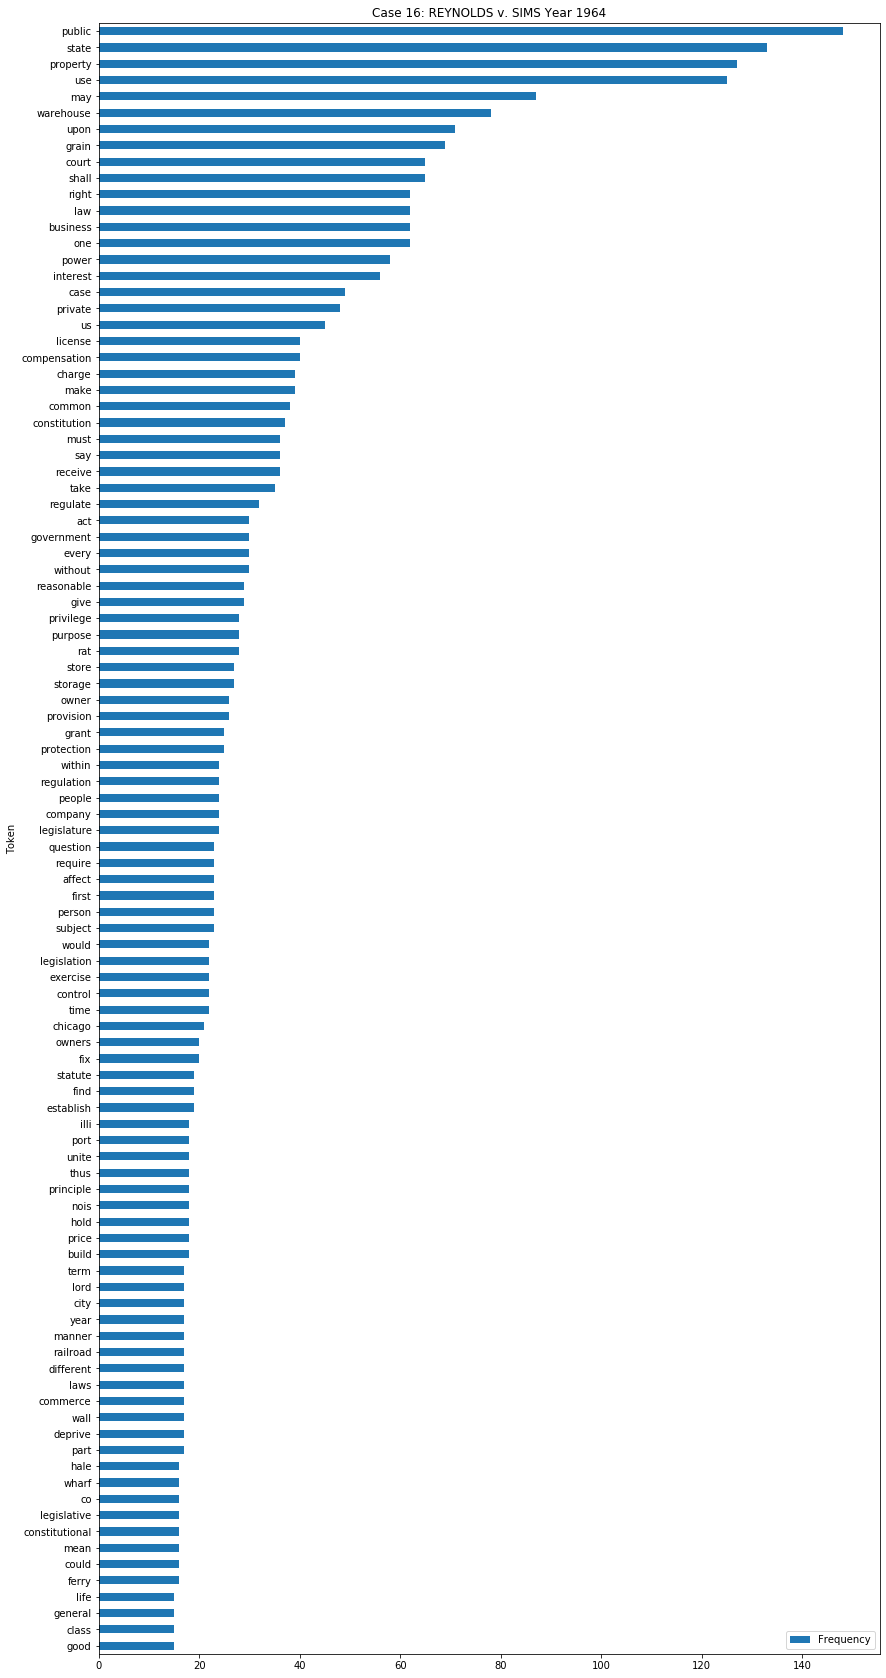

In [285]:
case_number=16

case_Name = cases_df["name"][case_number]
case_Year = cases_df["year"][case_number]
header = 'Case ' + str(case_number) + ': ' + case_Name + ' Year ' + str(case_Year)
ax = frequency_dist_limited.plot.barh(x='Token', y='Frequency', rot=0, title=header, figsize=(14, 30)).get_figure().savefig('NLP_Token_Graph/Token_16.png')

In [217]:
case_number=0

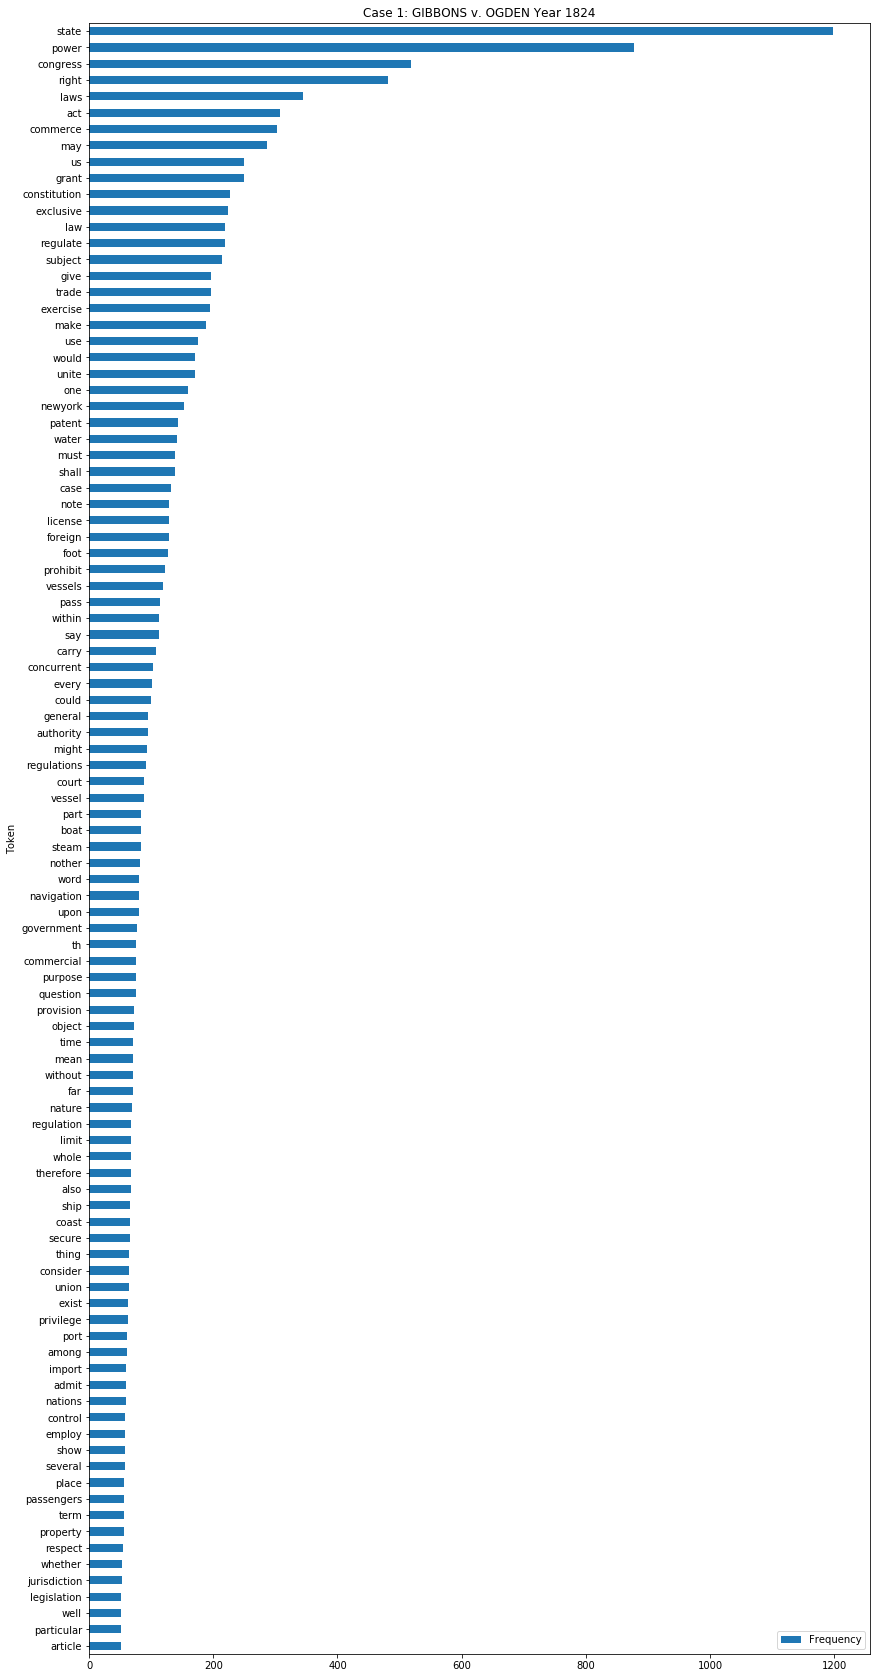

In [266]:
case_number=1
frequency_dist[case_number]
frequency_dist_key = []
frequency_dist_value = []
for key in frequency_dist[case_number]:
    value = frequency_dist[case_number][key]
    frequency_dist_key.append(key)
    frequency_dist_value.append(value)
    
frequency_dist_df = pd.DataFrame(list(zip(frequency_dist_key, frequency_dist_value)), columns=['Token', 'Frequency'])
frequency_dist_df = frequency_dist_df.sort_values(by='Frequency', ascending=False)
frequency_dist_limited = frequency_dist_df[:100]
frequency_dist_limited = frequency_dist_limited.sort_values(by='Frequency')

case_Name = cases_df["name"][case_number]
case_Year = cases_df["year"][case_number]
header = 'Case ' + str(case_number) + ': ' + case_Name + ' Year ' + str(case_Year)
ax = frequency_dist_limited.plot.barh(x='Token', y='Frequency', rot=0, title=header, figsize=(14, 30))

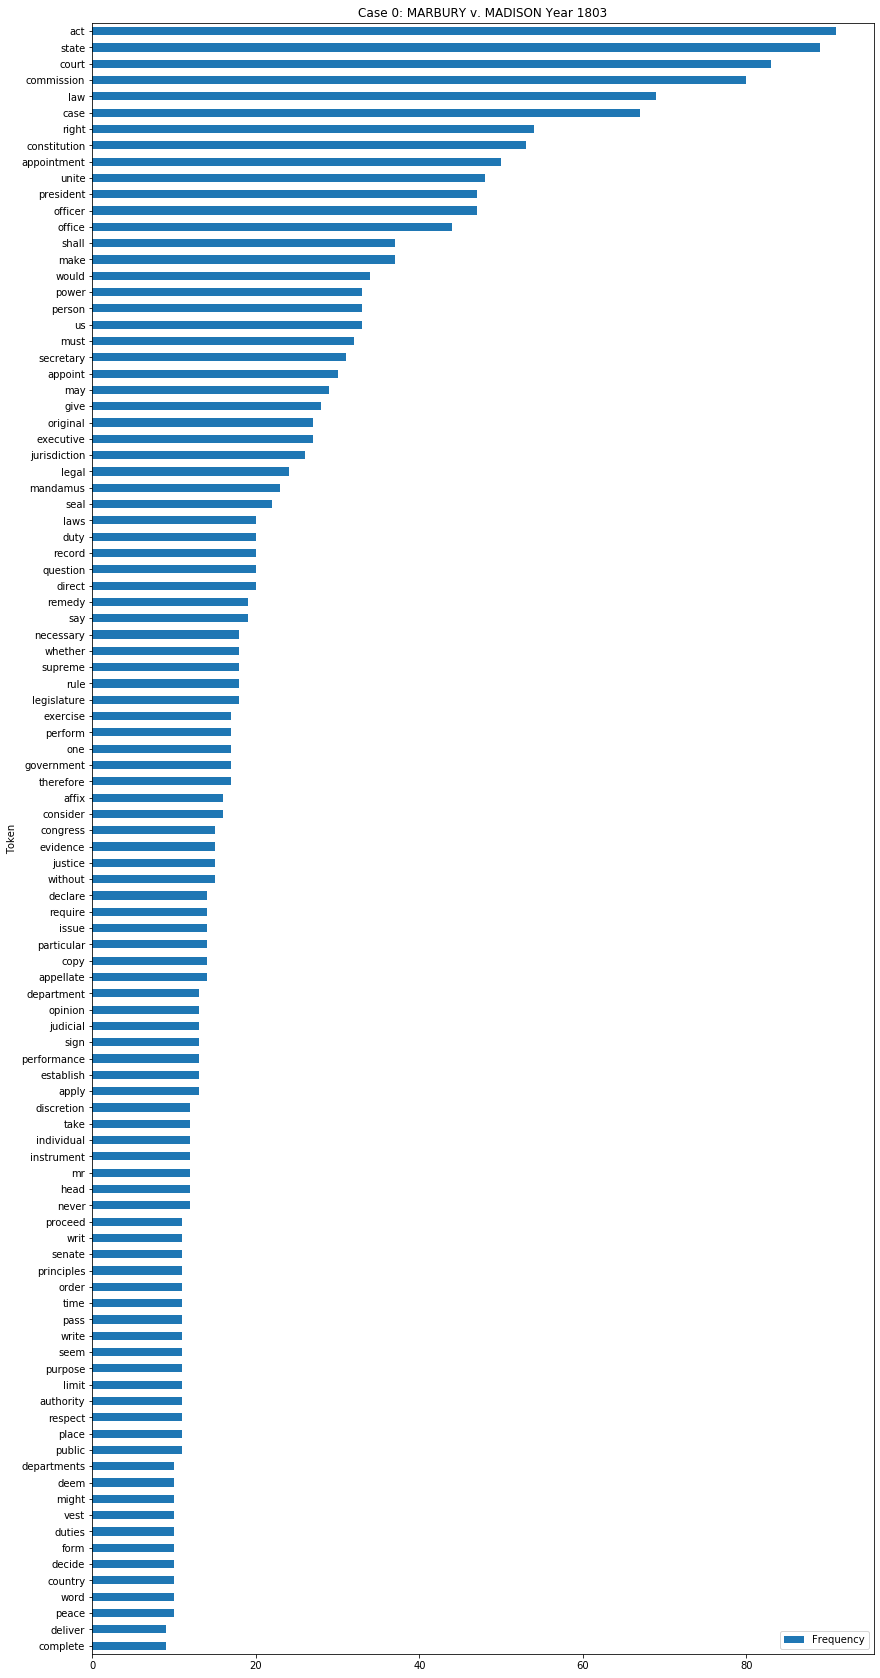

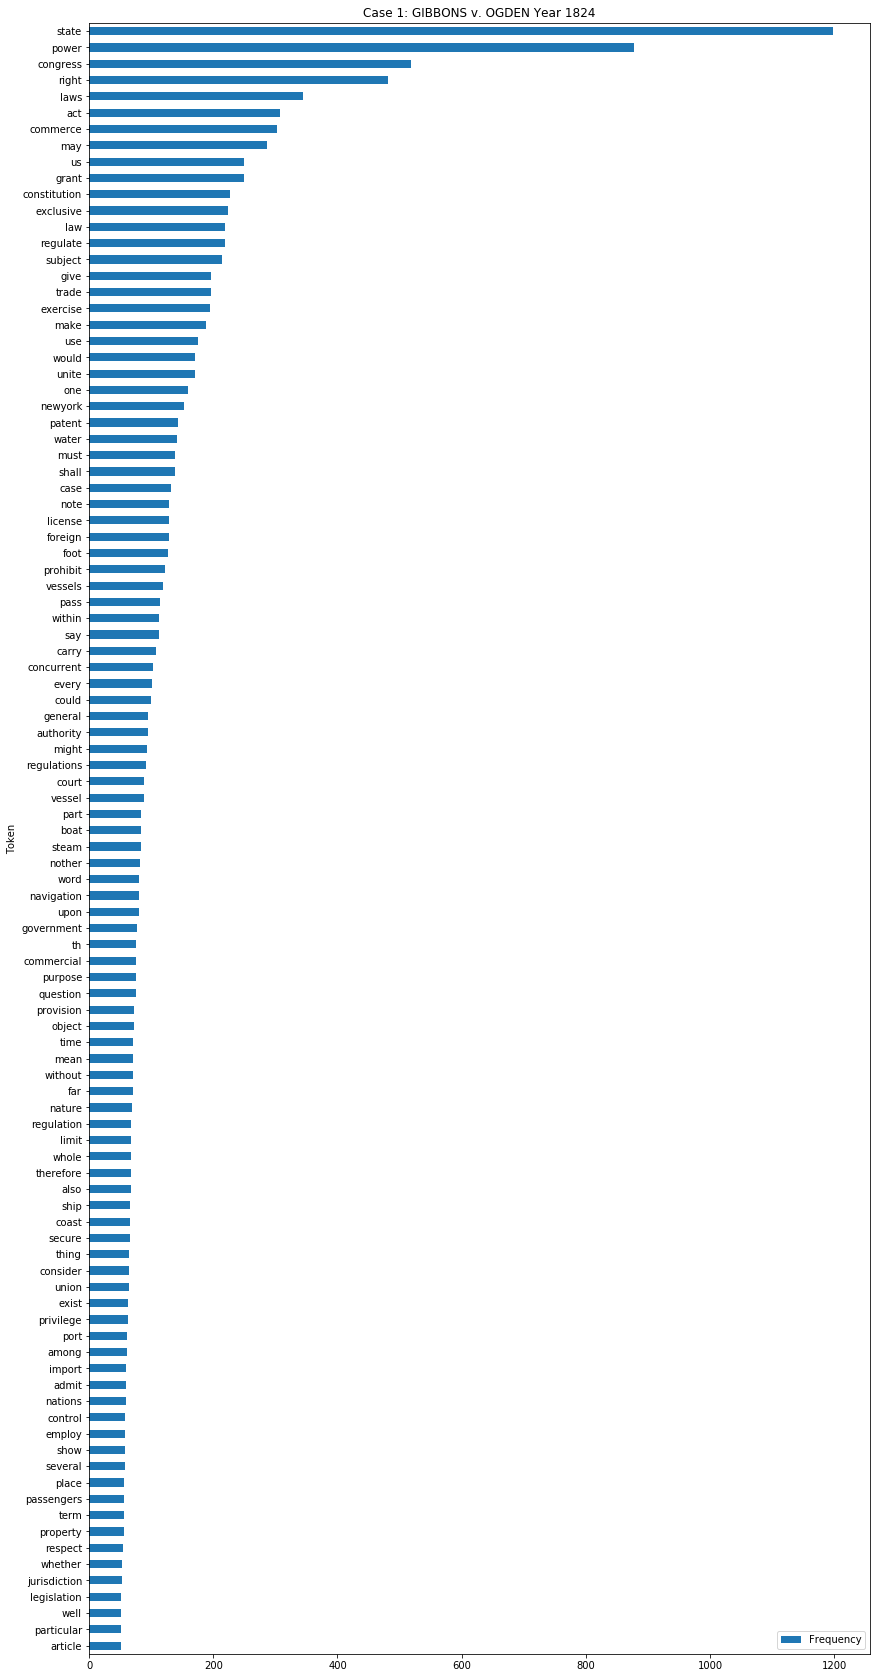

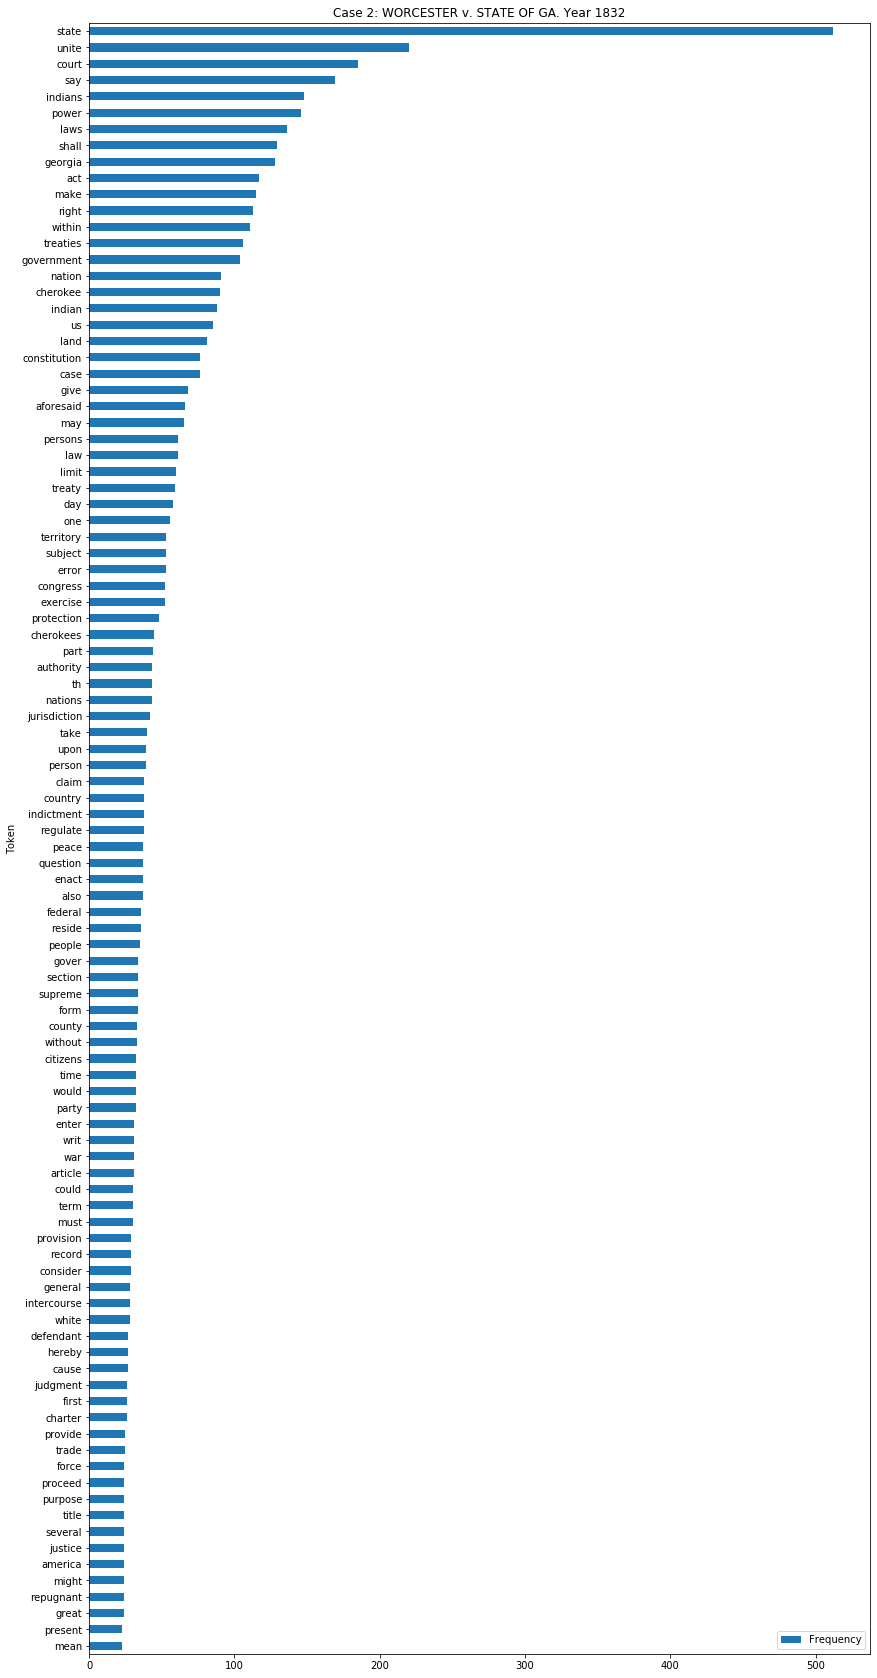

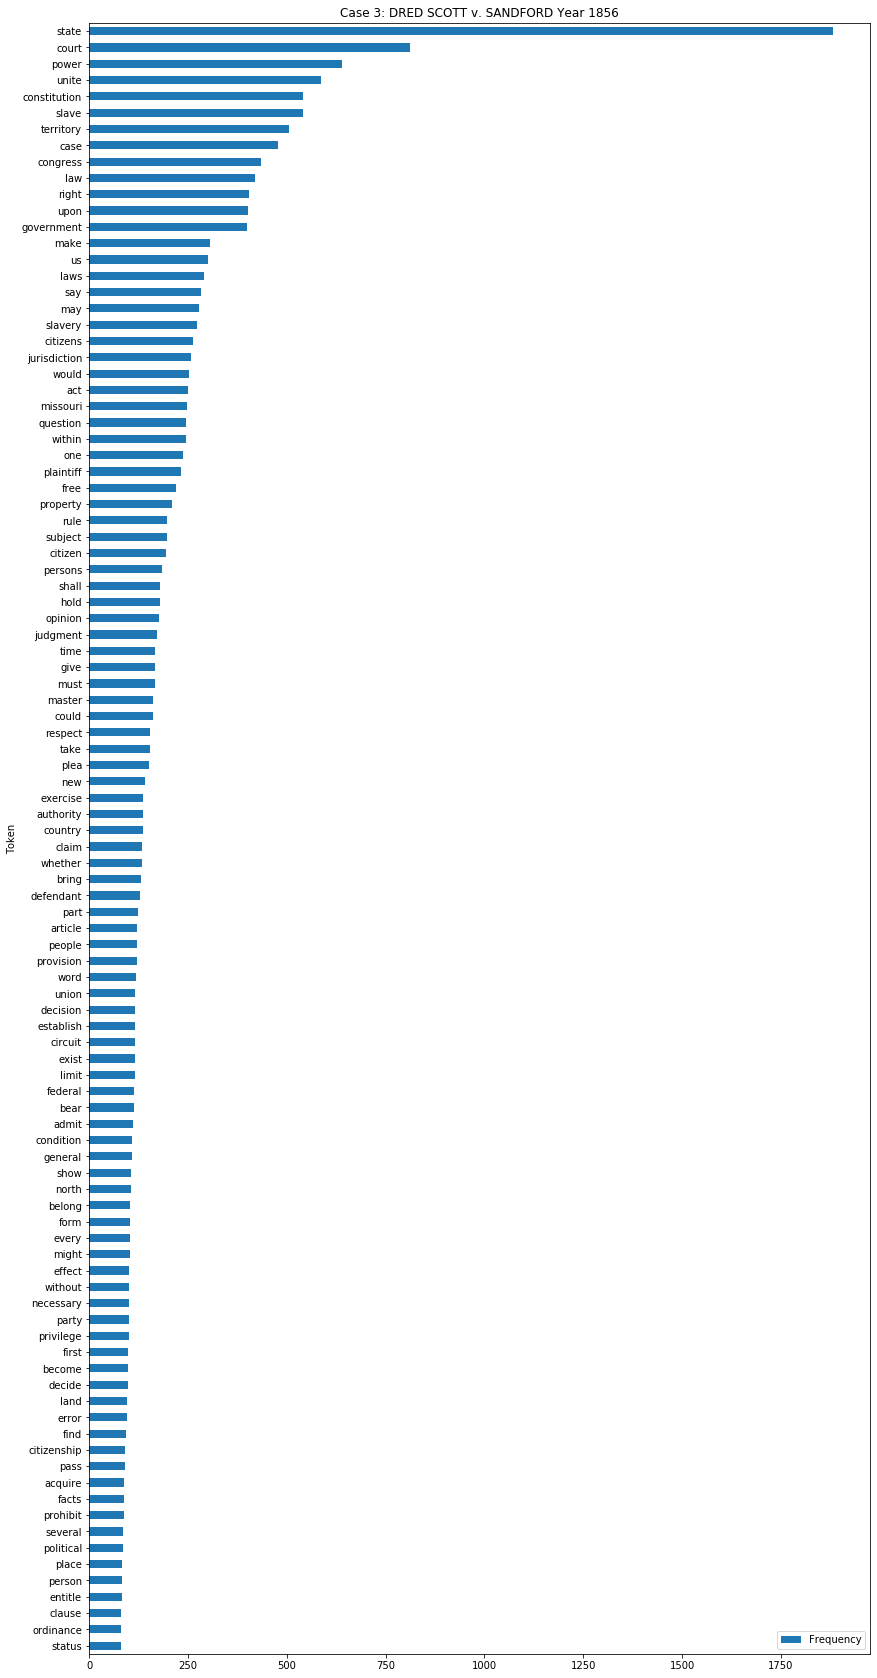

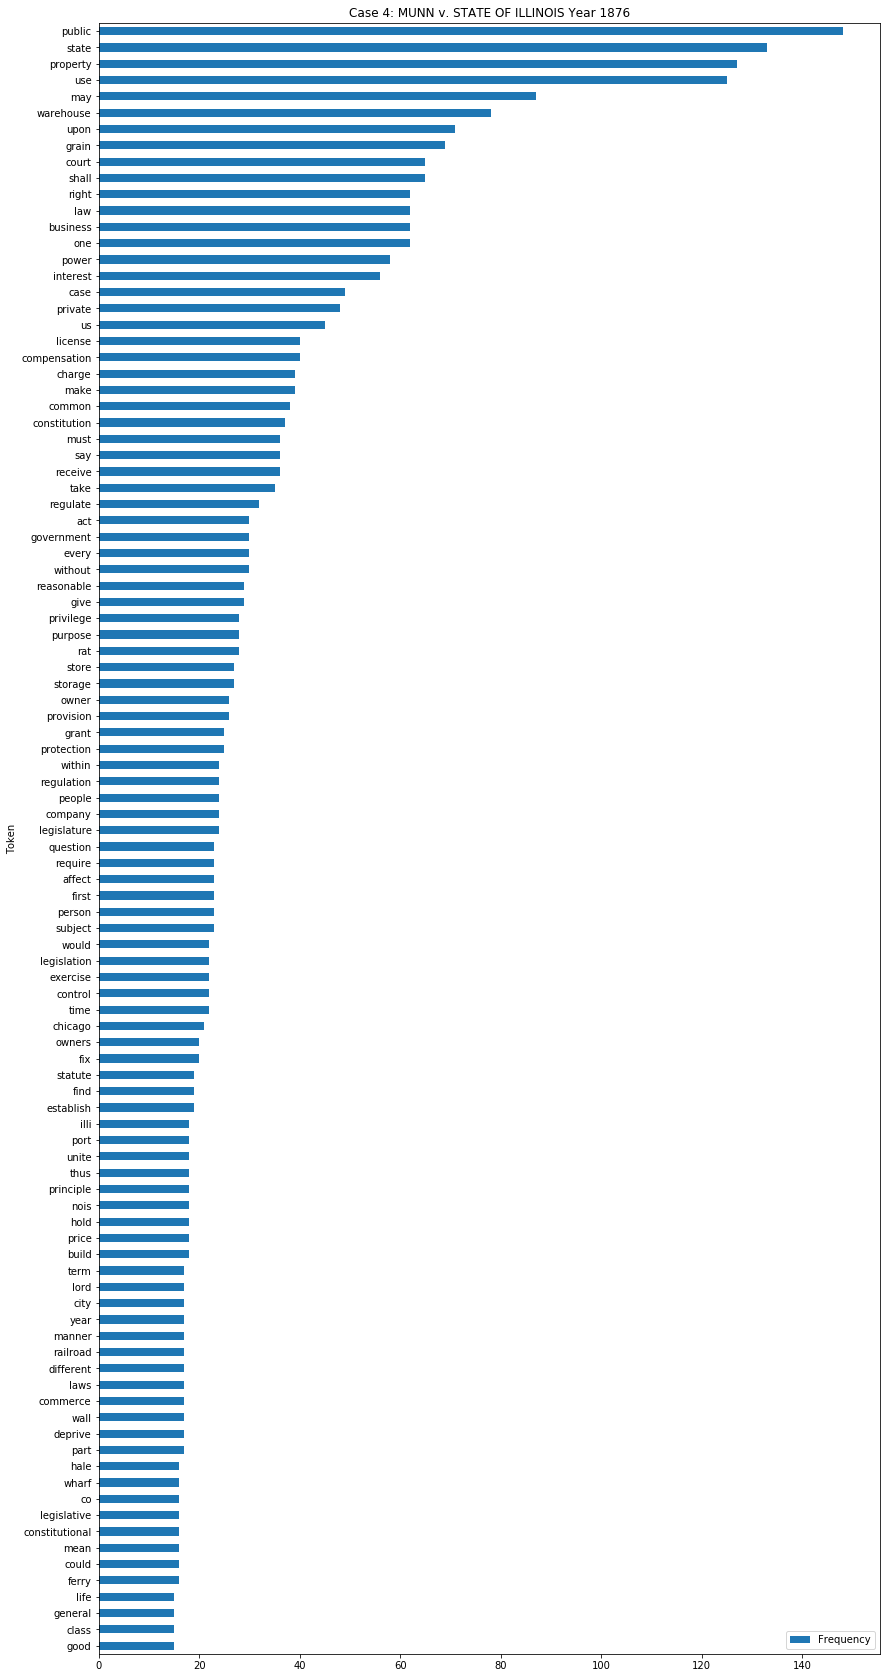

In [288]:
total_cases = 5
for case_number in range(total_cases):
    frequency_dist[case_number]
    frequency_dist_key = []
    frequency_dist_value = []
    for key in frequency_dist[case_number]:
        value = frequency_dist[case_number][key]
        frequency_dist_key.append(key)
        frequency_dist_value.append(value)
    
    frequency_dist_df = pd.DataFrame(list(zip(frequency_dist_key, frequency_dist_value)), columns=['Token', 'Frequency'])
    frequency_dist_df = frequency_dist_df.sort_values(by='Frequency', ascending=False)
    frequency_dist_limited = frequency_dist_df[:100]
    frequency_dist_limited = frequency_dist_limited.sort_values(by='Frequency')

    case_Name = cases_df["name"][case_number]
    case_Year = cases_df["year"][case_number]
    header = 'Case ' + str(case_number) + ': ' + case_Name + ' Year ' + str(case_Year)
    ax = frequency_dist_limited.plot.barh(x='Token', y='Frequency', rot=0, title=header, figsize=(14, 30))

### Looking at Cases at the end of the List

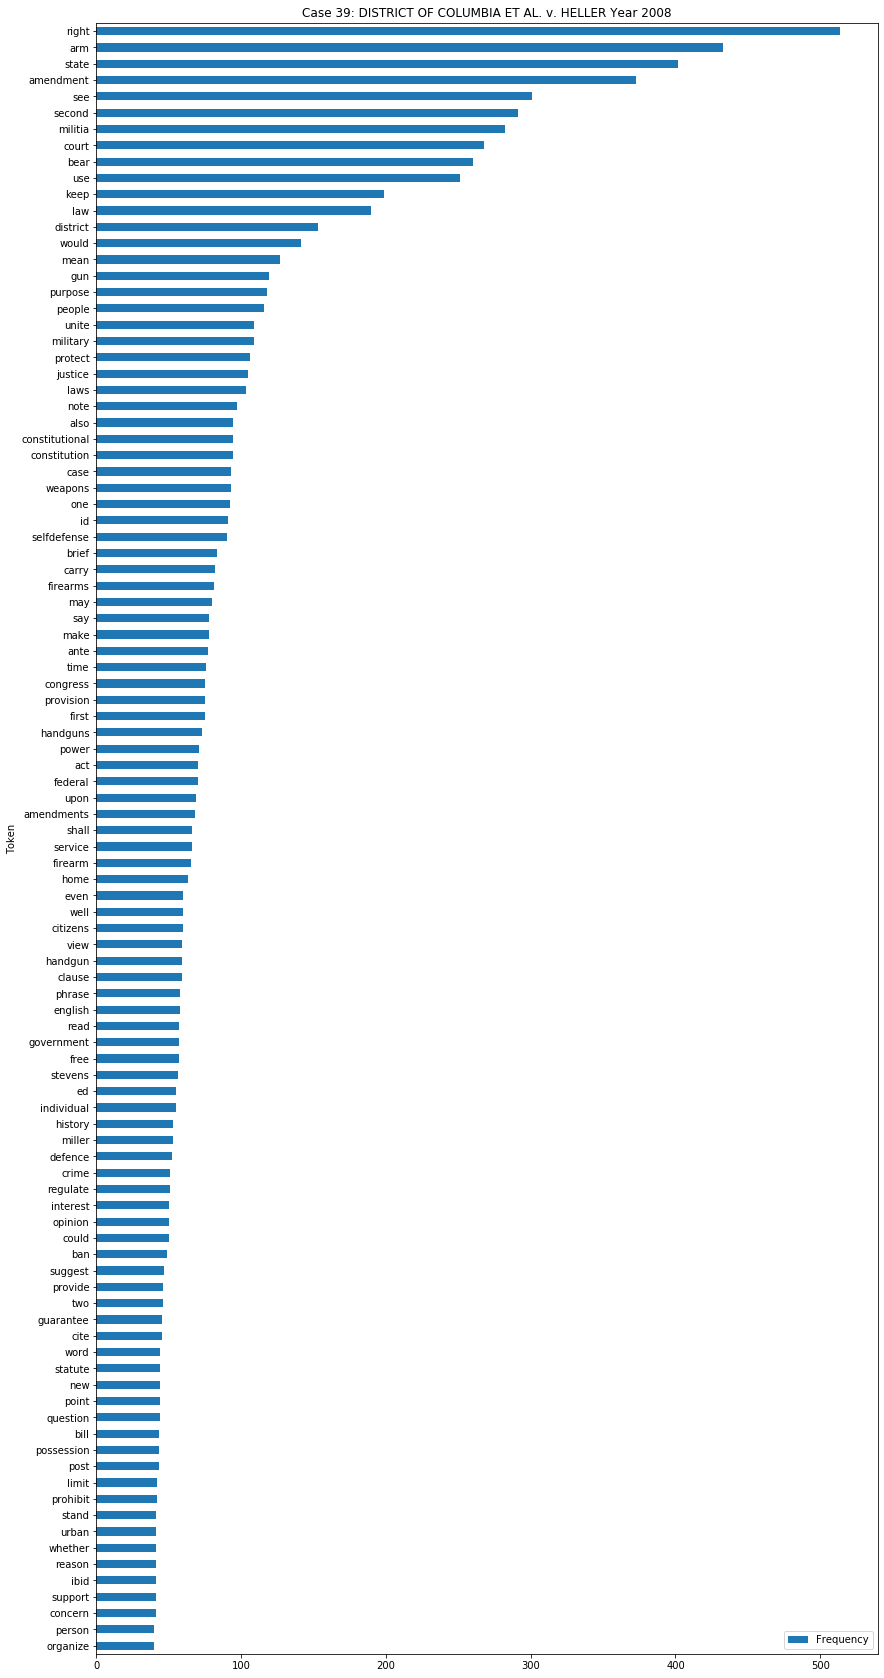

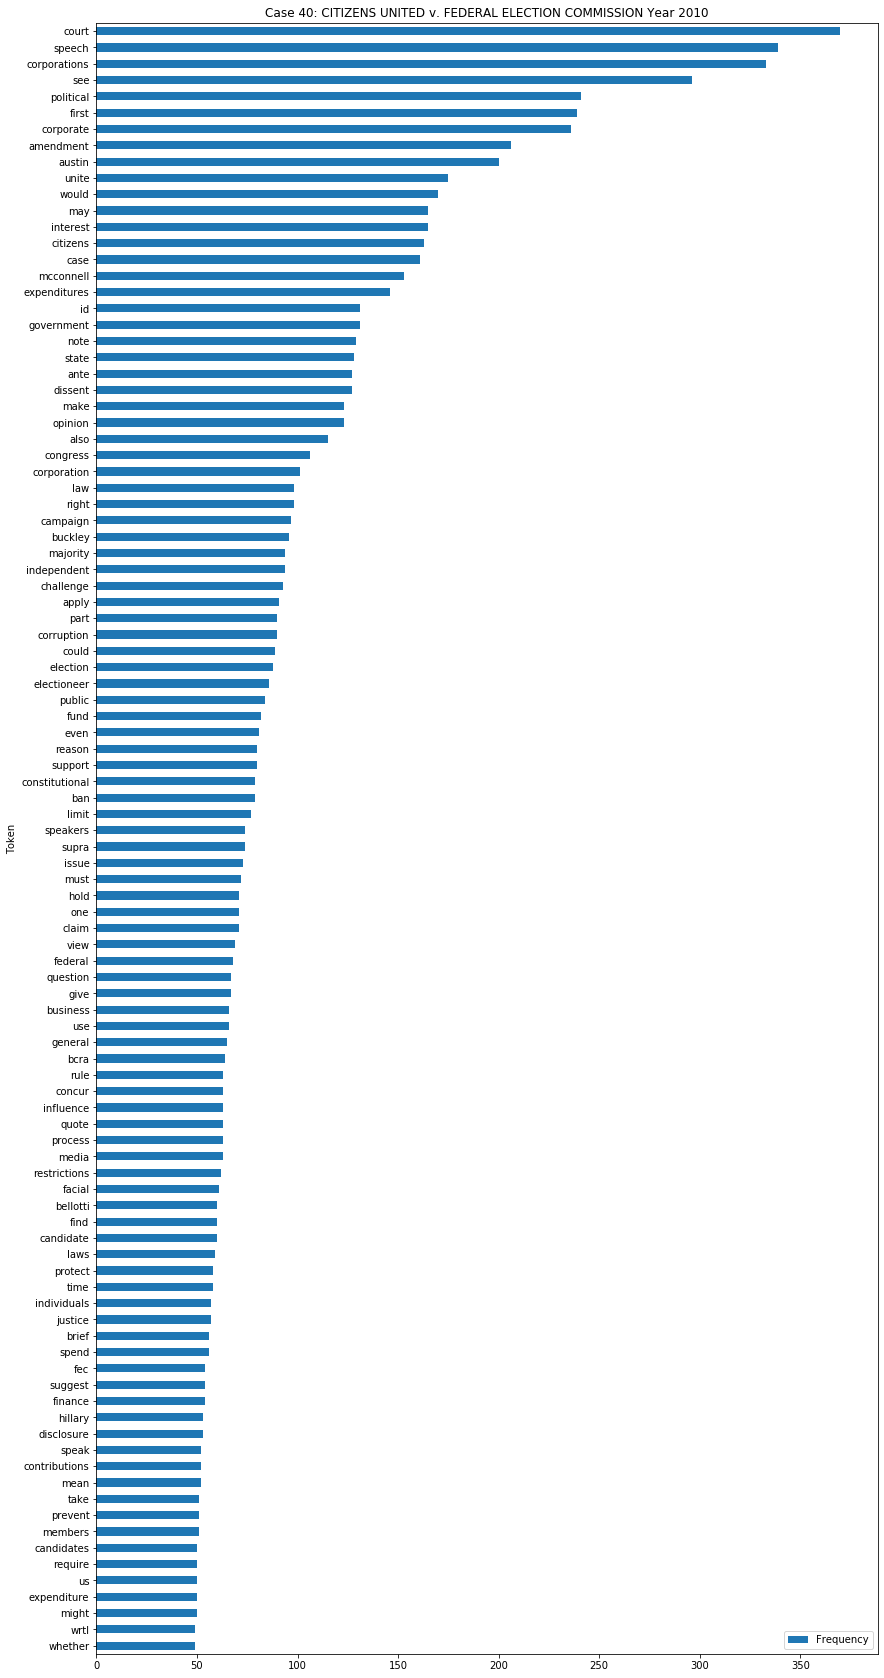

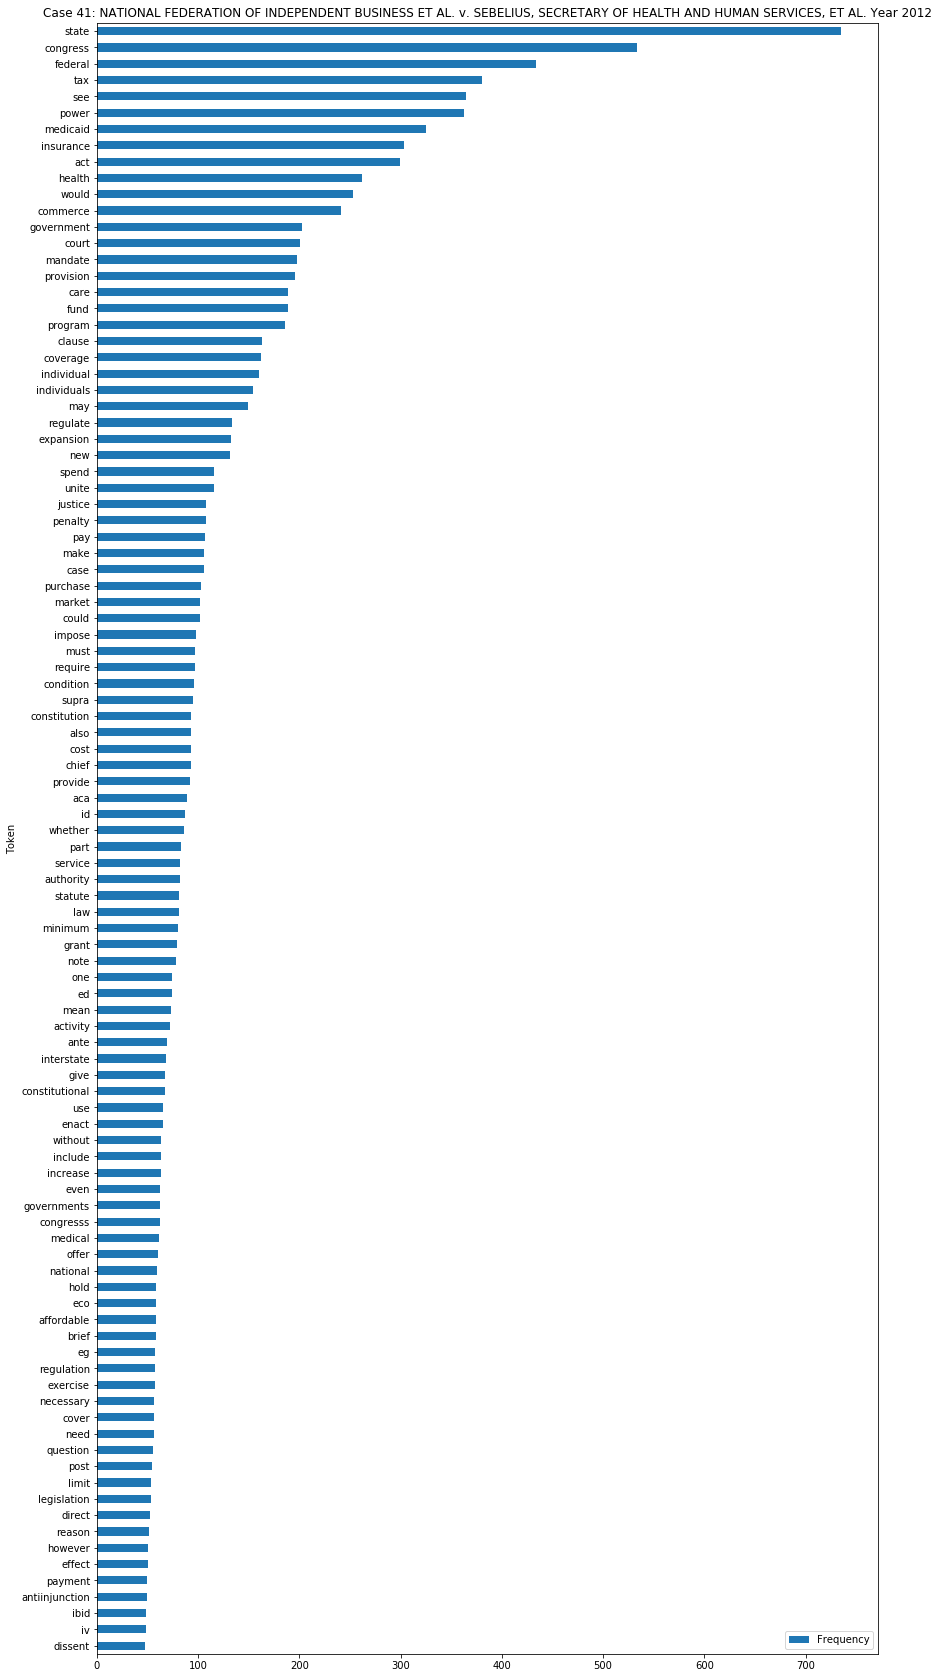

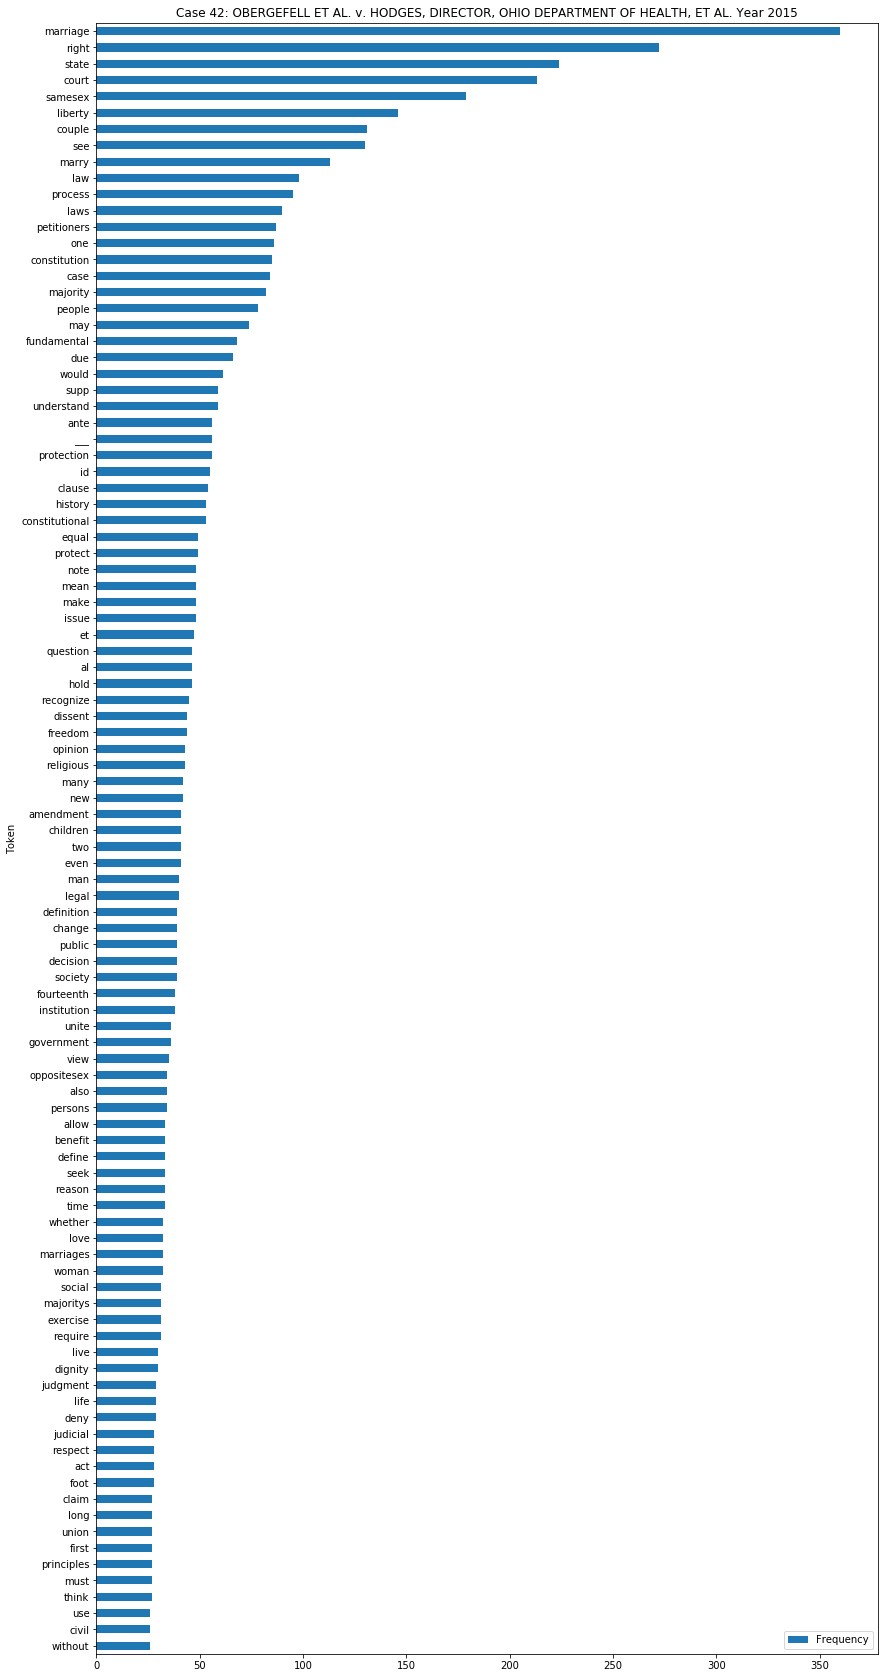

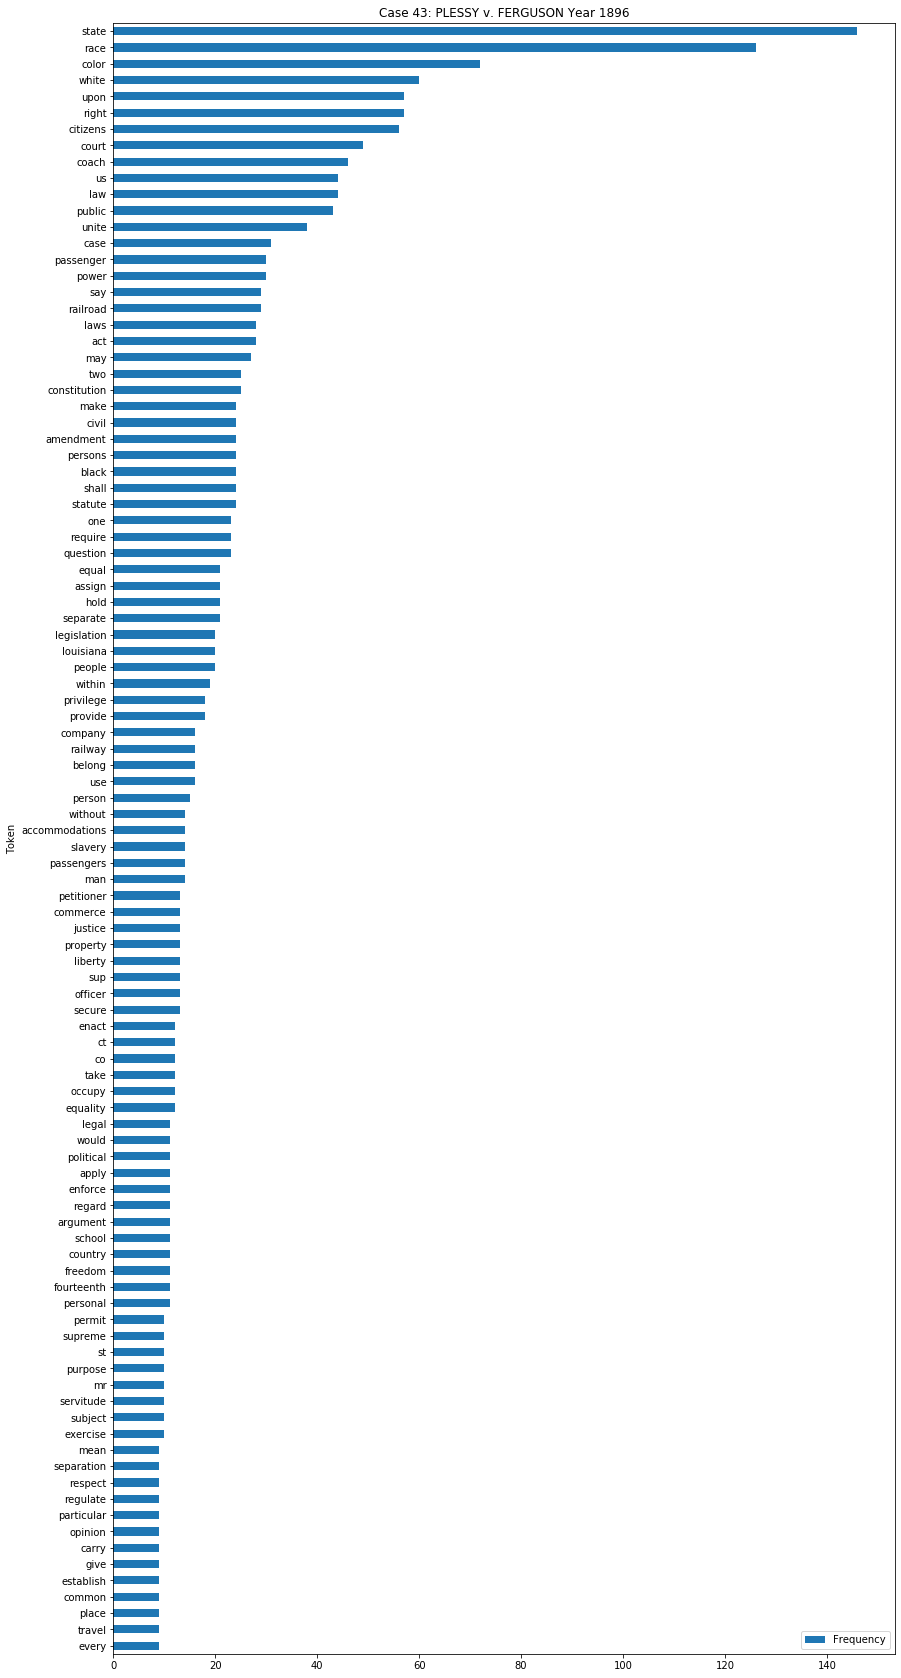

In [287]:
total_cases = 5
for case_number in range(total_cases):
    case_number = 39 + case_number
    frequency_dist[case_number]
    frequency_dist_key = []
    frequency_dist_value = []
    for key in frequency_dist[case_number]:
        value = frequency_dist[case_number][key]
        frequency_dist_key.append(key)
        frequency_dist_value.append(value)
    
    frequency_dist_df = pd.DataFrame(list(zip(frequency_dist_key, frequency_dist_value)), columns=['Token', 'Frequency'])
    frequency_dist_df = frequency_dist_df.sort_values(by='Frequency', ascending=False)
    frequency_dist_limited = frequency_dist_df[:100]
    frequency_dist_limited = frequency_dist_limited.sort_values(by='Frequency')

    case_Name = cases_df["name"][case_number]
    case_Year = cases_df["year"][case_number]
    header = 'Case ' + str(case_number) + ': ' + case_Name + ' Year ' + str(case_Year)
    ax = frequency_dist_limited.plot.barh(x='Token', y='Frequency', rot=0, title=header, figsize=(14, 30))
    

### Word Cloud

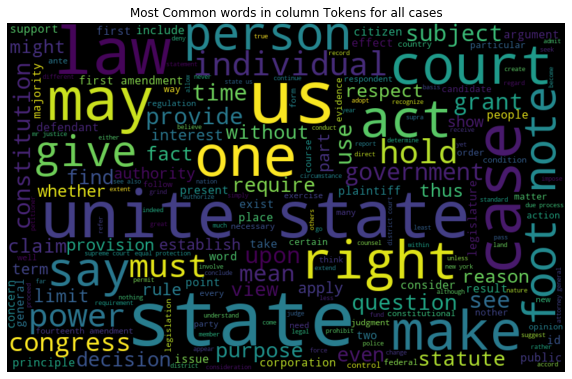

In [246]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in text_and_tokens['tokens']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tokens for all cases")
plt.show()

### NER-tagging 

In [ ]:
#!pip install spacy

In [238]:
import spacy

In [239]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [240]:
nlp = spacy.load('en_core_web_sm')

In [241]:
sentence = 'unite state supreme court marbury madison argue decide february december term william marbury dennis ramsay robert townsend hooe william harper counsel us severally move court rule jam madison secretary state unite state show cause mandamus issue command cause deliver respectively several commission justices peace district columbia motion support affidavits follow facts notice motion give mr madison mr adams late president unite state nominate applicants senate advice consent appoint justices peace district columbia senate advise consent appointments commission due form sign say president appoint justices seal unite state due form affix say commission secretary state applicants request mr madison deliver say commission comply request say commission withhold applicants make application mr madison secretary state unite state office information whether commission sign seal aforesaid explicit satisfactory information give answer inquiry either secretary state officer department state application make secretary senate certificate nomination applicants advice consent senate decline give certificate whereupon rule make show cause fourth day term rule duly serve us mr jacob wagner mr daniel brent summon attend court require give evidence object swear allege clerk department state bind disclose facts relate business transactions office court order witness swear answer take write inform question ask might state objections answer particular question mr lincoln act secretary state circumstances state affidavits occur call upon give testimony object answer question put write court say nothing confidential require disclose oblige answer think thing communicate confidentially bind disclose oblige state thing would criminate question argue counsel relators whether supreme court award writ mandamus case whether lie secretary state case whatever whether present case court may award mandamus jam madison secretary state us mr chief justice marshall deliver opinion court last term affidavits read file clerk rule grant case require secretary state show cause mandamus us issue direct deliver william marbury commission justice peace county washington district columbia cause show present motion mandamus peculiar delicacy case novelty circumstances real difficulty attend point occur require complete exposition principles opinion give court find principles side applicant ably argue bar render opinion court departure form though substance point state argument order court view subject follow question consider decide applicant right commission demand right right violate laws country afford remedy afford remedy mandamus issue court first object inquiry applicant right commission demand right originate act congress pass february concern district columbia divide district two counties eleventh section law enact shall appoint say counties number discreet persons justices peace president unite state shall time time think expedient continue office five years us appear affidavits compliance law commission william marbury justice peace county washington sign john adams president unite state seal unite state affix commission never reach person make order determine whether entitle commission become necessary inquire whether appoint office appoint law continue office five years entitle possession evidence office complete become property second section second article constitution declare president shall nominate advice consent senate shall appoint ambassadors public minister consuls officer unite state whose appointments otherwise provide third section declare shall commission officer unite state act congress direct secretary state keep seal unite state make record affix say seal civil commission officer unite state appoint president consent senate president alone provide say seal shall affix commission shall sign president unite state clauses constitution laws unite state affect part case seem contemplate three distinct operations nomination sole act president completely voluntary appointment also act president also voluntary act though perform advice consent senate us commission grant commission person appoint might perhaps deem duty enjoin constitution shall say instrument commission officer unite state act appoint office commission person appoint scarcely consider one since power perform give two separate distinct section constitution distinction appointment commission render apparent advert provision second section second article constitution authorise congress vest law appointment inferior officer think proper president alone court law head departments thus contemplate case law may direct president commission officer appoint court head departments case issue commission would apparently duty distinct appointment performance perhaps could legally refuse although clause constitution require president commission officer unite state may never apply officer appoint otherwise yet would difficult deny legislative power apply case consequence constitutional distinction appointment office commission officer appoint remain practice president commission officer appoint authority follow existence distinction appointment evidence public act commission performance public act would create officer removable president would either give right commission enable perform duties without observations premise solely purpose render intelligible apply directly particular case consideration us appointment make president advice consent senate evidence act commission case therefore commission appointment seem inseparable almost impossible show appointment otherwise prove existence commission still commission necessarily appointment though conclusive evidence stage amount conclusive evidence answer question seem obvious one appointment sole act president must completely evidence show every thing perform commission instead evidence appointment even consider constitute appointment still would make last act president perform furthest commission complete last act president signature commission act advice consent senate nomination time deliberation pass decide judgment advice consent senate concur nomination make officer appoint appointment evidence open unequivocal act last act require person make necessarily exclude idea far respect appointment inchoate incomplete transaction point time must take power executive officer removable must cease point time must constitutional power appointment exercise power exercise last act require person possess power perform last act signature commission idea seem prevail legislature act pass convert department us foreign affairs department state act enact secretary state shall keep seal unite state shall make record shall affix say seal civil commission officer unite state appoint president provide say seal shall affix commission shall sign president unite state instrument act without special warrant president therefor signature warrant affix great seal commission great seal affix instrument complete attest act suppose public notoriety verity presidential signature never affix till commission sign signature give force effect commission conclusive evidence appointment make commission sign subsequent duty secretary state prescribe law guide president affix seal unite state commission record proceed may vary judgment executive shall suggest one eligible precise course accurately mark law strictly pursue duty secretary state conform law officer unite state bind obey laws act respect properly state bar authority law instructions president ministerial act law enjoin particular officer particular purpose suppose solemnity affix seal necessary validity commission even completion appointment still seal affix appointment make us commission valid solemnity require law act perform part government executive invest person office unless appointment make executive cannot make one without co operation others search anxiously principles contrary opinion may support none find appear sufficient force maintain opposite doctrine imagination court could suggest deliberately examine allow weight appear possible give shake opinion form consider question conjecture commission may assimilate deed validity delivery essential idea find supposition commission merely evidence appointment actual appointment supposition mean unquestionable purpose examine objection fairly let concede principle claim support establish appointment constitution make president personally delivery deed appointment necessary completion must make president also necessary livery make personally grantee office never make law would seem contemplate make secretary state since direct secretary affix seal commission shall sign president act livery necessary give validity commission deliver execute give secretary purpose seal record transmit party case letter patent certain solemnities require law solemnities evidence us validity instrument formal delivery person among case commission sign manual president seal unite state solemnities objection therefore touch case also occur possible barely possible transmission commission acceptance thereof might deem necessary complete right plaintiff transmission commission practice direct convenience law cannot therefore necessary constitute appointment must precede mere act president executive require every person appoint office take mean procure commission appointment would less valid account appointment sole act president transmission commission sole act officer duty assign may accelerate retard circumstances influence appointment commission transmit person already appoint person appoint letter enclose commission happen get postoffice reach safety miscarry may tendency elucidate point inquire whether possession original commission indispensably necessary authorize person appoint office perform duties office necessary loss commission would lose office negligence accident fraud fire theft might deprive individual office case presume could doubt copy record office secretary state would every intent purpose equal original act congress expressly make give copy validity would necessary prove original transmit afterwards lose copy would complete evidence original exist appointment make original transmit indeed appear us original mislay office state circumstance would affect operation copy requisites perform authorize record officer record instrument whatever order purpose give instrument law consider record although manual labour insert book keep purpose may perform case commission law order secretary state record therefore sign seal order record give whether insert book law record copy record declare equal original fee pay person require copy ascertain law keeper public record erase therefrom commission record refuse copy thereof person demand term prescribe law copy would equally original authorize justice peace proceed performance duty would equally original attest appointment transmission commission consider necessary give validity appointment still less acceptance appointment sole act president acceptance sole act officer plain common sense posterior appointment may resign may refuse accept neither one capable render appointment nonentity understand government apparent whole tenor conduct commission bear date salary officer commence appointment transmission acceptance commission person appoint office refuse accept office successor nominate place person us decline accept place person previously office create original vacancy therefore decidedly opinion court commission sign president appointment make commission complete seal unite state affix secretary state officer removable executive circumstance complete appointment concern act time revocable commission may arrest still office officer removable executive appointment revocable cannot annul confer legal right cannot resume discretion executive exercise appointment make make appointment power office terminate case law officer removable right office person appoint absolute unconditional power accept reject mr marbury since commission sign president seal secretary state appoint law create office give officer right hold five years independent executive appointment revocable vest officer legal right protect laws country withhold commission therefore act deem court warrant law violative vest legal right bring us second inquiry right right violate laws country afford remedy us essence civil liberty certainly consist right every individual claim protection laws whenever receive injury one first duties government afford protection great britain king sue respectful form petition never fail comply judgment court third volume commentaries page blackstone state two case remedy afford mere operation lawin case say general indisputable rule legal right also legal remedy suit action law whenever right invade afterwards page volume say next consider injuries cognizable court common law herein shall present remark possible injuries whatsoever fall within exclusive cognizance either ecclesiastical military maritime tribunals reason within cognizance common law court justice settle invariable principle laws england every right withhold must remedy every injury proper redress government unite state emphatically term government laws men certainly cease deserve high appellation laws furnish remedy violation vest legal right obloquy cast jurisprudence country must arise peculiar character case behove us inquire whether composition ingredient shall exempt legal investigation exclude injure party legal redress pursue inquiry first question present whether arrange us class case come description damnum absque injuriaa loss without injury description case never consider believe never consider comprehend offices trust honour profit office justice peace district columbia office therefore worthy attention guardianship laws receive attention guardianship create special act congress secure far laws give security person appoint fill five years account worthlessness thing pursue injure party allege without remedy nature transaction act deliver withhold commission consider mere political act belong executive department alone performance entire confidence place constitution supreme executive misconduct respect injure individual remedy may case question every act duty perform great departments government constitute case admit act concern invalid pass june secretary war order place pension list persons whose name contain report previously make congress refuse would wind veteran without remedy contend law precise term direct performance act individual interest law incapable secure obedience mandate account character person complaint make contend head departments amenable laws country whatever practice particular occasion may theory principle certainly never main us tained act legislature confer extraordinary privilege derive countenance doctrines common law state personal injury king subject presume impossible blackstone vol iii say injuries right property scarcely commit crown without intervention officer law matter right entertain respect delicacy furnish various methods detect errors misconduct agents king deceive induce temporary injustice act pass authorize sale land mouth kentucky river purchaser pay purchase money become completely entitle property purchase produce secretary state receipt treasurer upon certificate require law president unite state authorize grant patent enact patent shall countersign secretary state record office secretary state choose withhold patent patent lose refuse copy imagine law furnish injure person remedy believe person whatever would attempt maintain proposition follow question whether legality act head department examinable court justice must always depend nature act act examinable others must rule law guide court exercise jurisdiction instance may difficulty apply rule particular case cannot believe much difficulty lay rule constitution unite state president invest certain important political power us exercise use discretion accountable country political character conscience aid performance duties authorize appoint certain officer act authority conformity order case act act whatever opinion may entertain manner executive discretion may use still exist exist power control discretion subject political respect nation individual right entrust executive decision executive conclusive application remark perceive advert act congress establish department foreign affairs officer duties prescribe act conform precisely president mere organ communicate act officer officer never examinable court legislature proceed impose officer duties direct peremptorily perform certain act right individuals dependent performance act far officer law amenable laws conduct cannot discretion sport away vest right others conclusion reason head departments political confidential agents executive merely execute president rather act case executive possess constitutional legal discretion nothing perfectly clear act politically examinable specific duty assign law individual right depend upon performance duty seem equally clear individual consider injure right resort laws country remedy rule let us inquire apply case consideration court us power nominate senate power appoint person nominate political power exercise president accord discretion make appointment exercise whole power discretion completely apply case law officer removable president new appointment may immediately make right officer terminate fact exist cannot make never exist appointment cannot annihilate consequently officer law removable president right acquire protect law resumable president cannot extinguish executive authority privilege assert like manner derive source question whether right vest nature judicial must try judicial authority example mr marbury take oaths magistrate proceed act one consequence suit institute defence depend magistrate validity appointment must determine judicial authority conceive virtue appointment legal right either commission make copy commission equally question examinable court decision court upon must depend opinion entertain appointment question discuss opinion latest point time take appointment complete evidence signature president seal unite state affix commission opinion court sign commission mr marbury president unite state appoint justice us peace county washington district columbia seal unite state affix thereto secretary state conclusive testimony verity signature completion appointment appointment confer legal right office space five years legal title office consequent right commission refusal deliver plain violation right laws country afford remedy remain inquire whether entitle remedy apply depend nature writ apply power court nature writ blackstone third volume commentaries page define mandamus command issue kings name court kings bench direct person corporation inferior court judicature within kings dominions require particular thing therein specify appertain office duty court kings bench previously determine least suppose consonant right justice lord mansfield burrow case king baker et al state much precision explicitness case writ may usedwhenever say able judge right execute office perform service exercise franchise especially matter public concern attend profit person keep possession dispossess right us specific legal remedy court ought assist mandamus upon reason justice writ express upon reason public policy preserve peace order good government case say writ ought use upon occasion law establish specific remedy justice good government ought one addition authorities particularly cite many others rely bar show far practice conform general doctrines quote writ award would direct officer government mandate would use word blackstone particular thing therein specify appertain office duty court previously determine least suppose consonant right justice word lord mansfield applicant case right execute office public concern keep possession right circumstances certainly concur case still render mandamus proper remedy officer direct must one legal principles writ may direct person apply must without specific legal remedy respect officer would direct intimate political relation subsist president unite state head departments necessarily render legal investigation act one high officer peculiarly irksome well delicate excite hesitation respect propriety enter investigation impressions often receive without much reflection examination wonderful case assertion individual legal claim court justice claim duty court attend first view consider us attempt intrude cabinet intermeddle prerogatives executive scarcely necessary court disclaim pretensions jurisdiction extravagance absurd excessive could entertain moment province court solely decide right individuals inquire executive executive officer perform duties discretion question nature political constitution laws submit executive never make court question far intrusion secrets cabinet respect paper accord law upon record copy law give right payment ten cents intermeddling subject executive consider exercise control exalt station officer shall bar citizen assert court justice legal right shall forbid court listen claim issue mandamus direct performance duty depend executive discretion particular act congress general principles law one head departments commit illegal act colour office individual sustain injury cannot pretend office alone exempt sue ordinary mode proceed compel obey judgment law office exempt particular mode decide legality conduct case case would individual party complain authorize process office person writ direct nature thing propriety impropriety issue mandamus determine head department act case executive discretion exercise mere organ executive us repeat application court control respect conduct would reject without hesitation direct law certain act affect absolute right individuals performance place particular direction president performance president cannot lawfully forbid therefore never presume forbid example record commission patent land receive legal solemnities give copy record case perceive grind court country excuse duty give judgment right injure individual service perform person head department opinion seem first time take country must well recollect act pass direct secretary war place pension list disable officer soldier report circuit court act far duty impose court deem unconstitutional judge think law might execute character commissioners proceed act report character law deem unconstitutional circuit repeal different system establish question whether persons report judge commissioners entitle consequence report place pension list legal question properly determinable court although act place persons list perform head department question might properly settle congress pass act february make duty secretary war conjunction attorney general take measure might necessary obtain adjudication supreme court unite us state validity right claim act aforesaid passage act mandamus move direct secretary war command place pension list person state report judge therefore much reason believe mode try legal right complainant deem head department highest law officer unite state proper could select purpose subject bring court decision mandamus would lie head department direct perform act enjoin law performance individual vest interest mandamus ought issue casethe decision necessarily make report commissioners confer applicant legal right judgment case understand decide merit claim description persons report commissioners find necessary pursue mode prescribe law subsequent deem unconstitutional order place pension list doctrine therefore advance mean novel one true mandamus move performance act expressly enjoin statute deliver commission subject act congress silent difference consider affect case already state applicant commission vest legal right executive cannot deprive appoint office removable executive us appoint right commission secretary receive president use act congress indeed order secretary state send place hand person entitle cannot lawfully withhold another person first doubt whether action detinue specific legal remedy commission withhold mr marbury case mandamus would improper doubt yield consideration judgment detinue thing value value public office sell incapable ascertain applicant right office nothing obtain office obtain commission copy record plain case mandamus either deliver commission copy record remain inquire whether issue court act establish judicial court unite state authorize supreme court issue writs mandamus case warrant principles usages law court appoint persons hold office authority unite state secretary state person hold office authority unite state precisely within letter description court authorize issue writ mandamus officer must law unconstitutional therefore absolutely incapable confer authority assign duties word purport confer assign constitution vest whole judicial power unite state one supreme court inferior court congress shall time time ordain establish power expressly extend case arise laws unite state consequently form may exercise present us case right claim give law unite state distribution power declare supreme court shall original jurisdiction case affect ambassadors public minister consuls state shall party case supreme court shall appellate jurisdiction insist bar original grant jurisdiction supreme inferior court general clause assign original jurisdiction supreme court contain negative restrictive word power remain legislature assign original jurisdiction court case specify article recite provide case belong judicial power unite state intend leave discretion legislature apportion judicial power supreme inferior court accord body would certainly useless proceed define judicial power tribunals vest subsequent part section mere surplusage entirely without mean construction congress remain liberty give court appellate jurisdiction constitution declare jurisdiction shall original original jurisdiction constitution declare shall appellate distribution jurisdiction make constitution form without substance affirmative word often operation negative object affirm case negative exclusive sense must give operation cannot presume clause constitution intend without effect therefore construction inadmissible unless word require us solicitude convention respect peace foreign power induce provision supreme court take original jurisdiction case might suppose affect yet clause would proceed provide case restriction power congress intend appellate jurisdiction case exceptions congress might make restriction unless word deem exclusive original jurisdiction instrument organize fundamentally judicial system divide one supreme many inferior court legislature may ordain establish enumerate power proceed far distribute define jurisdiction supreme court declare case shall take original jurisdiction others shall take appellate jurisdiction plain import word seem one class case jurisdiction original appellate appellate original construction would render clause inoperative additional reason reject construction adhere obvious mean enable court issue mandamus must show exercise appellate jurisdiction necessary enable exercise appellate jurisdiction state bar appellate jurisdiction may exercise variety form legislature mandamus use purpose must obey true yet jurisdiction must appellate original essential criterion appellate jurisdiction revise correct proceed cause already institute create case although therefore mandamus may direct court yet issue writ officer delivery paper effect sustain original action paper therefore seem belong us appellate original jurisdiction neither necessary case enable court exercise appellate jurisdiction authority therefore give supreme court act establish judicial court unite state issue writs mandamus public officer appear warrant constitution become necessary inquire whether jurisdiction confer exercise question whether act repugnant constitution become law land question deeply interest unite state happily intricacy proportion interest seem necessary recognise certain principles suppose long well establish decide people original right establish future government principles opinion shall conduce happiness basis whole american fabric erect exercise original right great exertion ought frequently repeat principles therefore establish deem fundamental authority proceed supreme seldom act design permanent original supreme organize government assign different departments respective power may either stop establish certain limit transcend departments government unite state latter description power legislature define limit limit may mistake forget constitution write purpose power limit purpose limitation commit write limit may time pass intend restrain distinction government limit unlimited power abolish limit confine persons impose act pro us hibited act allow equal obligation proposition plain contest constitution control legislative act repugnant legislature may alter constitution ordinary act alternatives middle grind constitution either superior paramount law unchangeable ordinary mean level ordinary legislative act like act alterable legislature shall please alter former part alternative true legislative act contrary constitution law latter part true write constitutions absurd attempt part people limit power nature illimitable certainly frame write constitutions contemplate form fundamental paramount law nation consequently theory every government must act legislature repugnant constitution void theory essentially attach write constitution consequently consider court one fundamental principles society therefore lose sight consideration subject act legislature repugnant constitution void notwithstanding invalidity bind court oblige give effect word though law constitute rule operative law would overthrow fact establish theory would seem first view absurdity gross insist shall however receive attentive consideration emphatically province duty judicial department say law apply rule particular case must necessity expound interpret rule two laws conflict court must decide operation us law opposition constitution law constitution apply particular case court must either decide case conformably law disregard constitution conformably constitution disregard law court must determine conflict rule govern case essence judicial duty court regard constitution constitution superior ordinary act legislature constitution ordinary act must govern case apply controvert principle constitution consider court paramount law reduce necessity maintain court must close eye constitution see law doctrine would subvert foundation write constitutions would declare act accord principles theory government entirely void yet practice completely obligatory would declare legislature shall expressly forbid act notwithstanding express prohibition reality effectual would give legislature practical real omnipotence breath profess restrict power within narrow limit prescribe limit declare limit may pass pleasure thus reduce nothing deem greatest improvement political institutionsa write constitution would sufficient america write constitutions view much reverence reject construction peculiar expressions constitution unite state furnish additional arguments favour rejection judicial power unite state extend case arise constitution us could intention give power say use constitution look case arise constitution decide without examine instrument arise extravagant maintain case constitution must look judge open part forbid read obey many part constitution serve illustrate subject declare tax duty shall lay article export state suppose duty export cotton tobacco flour suit institute recover ought judgment render case ought judge close eye constitution see law constitution declare bill attainder ex post facto law shall pass however bill pass person prosecute must court condemn death victims constitution endeavour preserveno person say constitution shall convict treason unless testimony two witness overt act confession open court language constitution address especially court prescribe directly rule evidence depart legislature change rule declare one witness confession court sufficient conviction must constitutional principle yield legislative act many selections might make apparent framers consti us tution contemplate instrument rule government court well legislature otherwise direct judge take oath support oath certainly apply especial manner conduct official character immoral impose use instrument know instrument violate swear support oath office impose legislature completely demonstrative legislative opinion subject word solemnly swear administer justice without respect persons equal right poor rich faithfully impartially discharge duties incumbent accord best abilities understand agreeably constitution laws unite state judge swear discharge duties agreeably constitution unite state constitution form rule government close upon cannot inspect real state things worse solemn mockery prescribe take oath become equally crime also entirely unworthy observation declare shall supreme law land constitution first mention laws unite state generally shall make pursuance constitution rank thus particular phraseology constitution unite state confirm strengthen principle suppose essential write constitutions law repugnant constitution void court well departments bind instrument rule must discharge'

In [242]:
doc = nlp(sentence)
for ent in doc.ents:
    print(ent.text, ent.label_)

state supreme court ORG
marbury madison argue PERSON
february december DATE
william marbury dennis PERSON
robert townsend PERSON
hooe william PERSON
jam madison PERSON
mandamus issue command ORG
district columbia GPE
madison PERSON
adams PERSON
senate ORG
columbia senate ORG
madison deliver ORG
request say commission ORG
madison ORG
senate ORG
senate ORG
fourth day DATE
jacob wagner PERSON
daniel brent PERSON
lincoln ORG
state circumstances state ORG
supreme court ORG
writ mandamus PERSON
mandamus jam madison PERSON
marshall PERSON
us GPE
william marbury commission PERSON
washington GPE
district columbia GPE
remedy PERSON
remedy mandamus PERSON
first ORDINAL
congress ORG
february DATE
district columbia GPE
two CARDINAL
five years DATE
marbury ORG
washington GPE
john adams PERSON
entitle commission ORG
five years DATE
senate ORG
third ORDINAL
congress ORG
senate ORG
three CARDINAL
senate us commission grant commission ORG
one CARDINAL
two CARDINAL
section constitution distinction appoin

In [243]:
ent.text

'constitution first mention'

In [350]:
#SPACY PERHAPS
#from nltk import ne_chunk

#text_tokens.apply(ne_chunk)

In [ ]:
#TF-IDF
